# Myeloid Figures

In [62]:
# update to the latest version, if not done yet.
# !pip install scvelo --upgrade --quiet

In [63]:
import scvelo as scv
import loompy

import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
from scipy import sparse
import os
import matplotlib as mpl
from anndata.experimental.multi_files import AnnCollection
from matplotlib.pyplot import rc_context

import celltypist
from celltypist import models

In [64]:
scv.settings.verbosity = 3
scv.logging.print_version()
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo', dpi=120, frameon=False, figsize=(3, 3), facecolor='white')

Running scvelo 0.2.4 (python 3.9.7) on 2023-11-07 10:02.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


In [65]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [66]:
wdir = "/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/31_Myeloid_Figures/"
os.chdir( wdir )

## Load the Data

In [67]:
adata = sc.read('/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/write/CRC_04_Cell_Atlas.h5ad', cache=False)

In [68]:
adata

AnnData object with n_obs × n_vars = 56163 × 13401
    obs: 'batch', 'n_genes_by_counts', 'total_counts', 'n_genes', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts_all', 'umap_density_batch', 'louvain', 'sample', 'louvain_anno'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'ribo', 'hb', 'log1p_mean_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_counts', 'mean', 'std'
    uns: 'batch_colors', 'draw_graph', 'hvg', 'log1p', 'louvain', 'louvain_anno_colors', 'louvain_colors', 'neighbors', 'pca', 'sample_colors', 'umap', 'umap_density_batch_params'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'dis

In [69]:
adata.obs

batch  n_genes_by_counts  total_counts  n_genes  \
AAAGGGCTCTGCAGCG-1   Col_N_1               1464        6027.0     1464   
AAAGTGAGTCCATACA-1   Col_N_1                965        2267.0      966   
AAAGTGATCGACCACG-1   Col_N_1                727        1730.0      727   
AAAGTGATCTGCATGA-1   Col_N_1                610        1206.0      610   
AACAACCTCAGCTTCC-1   Col_N_1               1718        4330.0     1718   
...                      ...                ...           ...      ...   
TTTGGTTGTTTGACAC-1  Liv_T_12               1497        4999.0     1497   
TTTGGTTTCATAGCAC-1  Liv_T_12               1289        3741.0     1289   
TTTGGTTTCCTCTAGC-1  Liv_T_12               1058        2873.0     1058   
TTTGTTGAGAGGTTTA-1  Liv_T_12                953        2525.0      953   
TTTGTTGGTTTGGCTA-1  Liv_T_12               1061        2860.0     1061   

                    log1p_n_genes_by_counts  log1p_total_counts  \
AAAGGGCTCTGCAGCG-1                 7.289611            8.704170   
AAAGTGAGTCCATACA-1                 6.873164            7.726654   
AAAGTGATCGACCACG-1                 6.590301            7.456455   
AAAGTGATCTGCATGA-1                 6.415097            7.095893   
AACAACCTCAGCTTCC-1                 7.449498            8.373553   
...                                     ...                 ...   
TTTGGTTGTTTGACAC-1                 7.311886            8.517193   
TTTGGTTTCATAGCAC-1                 7.162397            8.227375   
TTTGGTTTCCTCTAGC-1                 6.965080            7.963460   
TTTGTTGAGAGGTTTA-1                 6.860664            7.834392   
TTTGTTGGTTTGGCTA-1                 6.967909            7.958927   

                    pct_counts_in_top_20_genes  total_counts_mt  \
AAAGGGCTCTGCAGCG-1                   29.766053            477.0   
AAAGTGAGTCCATACA-1                   20.776356            226.0   
AAAGTGATCGACCACG-1                   31.734104            140.0   
AAAGTGATCTGCATGA-1                   21.890547             67.0   
AACAACCTCAGCTTCC-1                   23.602771            321.0   
...                                        ...              ...   
TTTGGTTGTTTGACAC-1                   25.585117             44.0   
TTTGGTTTCATAGCAC-1                   24.405239             88.0   
TTTGGTTTCCTCTAGC-1                   22.868082            159.0   
TTTGTTGAGAGGTTTA-1                   27.643564            121.0   
TTTGTTGGTTTGGCTA-1                   25.279720            115.0   

                    log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAAGGGCTCTGCAGCG-1               6.169611       7.914385             2692.0   
AAAGTGAGTCCATACA-1               5.424950       9.969122              420.0   
AAAGTGATCGACCACG-1               4.948760       8.092485               42.0   
AAAGTGATCTGCATGA-1               4.219508       5.555556              386.0   
AACAACCTCAGCTTCC-1               5.774551       7.413395              756.0   
...                                   ...            ...                ...   
TTTGGTTGTTTGACAC-1               3.806663       0.880176             1347.0   
TTTGGTTTCATAGCAC-1               4.488636       2.352312              933.0   
TTTGGTTTCCTCTAGC-1               5.075174       5.534285              761.0   
TTTGTTGAGAGGTTTA-1               4.804021       4.792079              683.0   
TTTGTTGGTTTGGCTA-1               4.753590       4.020979              483.0   

                    log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  \
AAAGGGCTCTGCAGCG-1                 7.898411        44.665672              0.0   
AAAGTGAGTCCATACA-1                 6.042633        18.526688              2.0   
AAAGTGATCGACCACG-1                 3.761200         2.427746              1.0   
AAAGTGATCTGCATGA-1                 5.958425        32.006634              0.0   
AACAACCTCAGCTTCC-1                 6.629363        17.459585              0.0   
...                                     ...              ...              ...   
TTTGGTTG

In [70]:
adata.obs['louvain_anno'].value_counts()

T cells              36566
Myeloid cells         6549
NK cells              5283
Epithelial cells      2743
B cells               2046
Endothelial cells     1703
Plasma cells           980
Fibroblast cells       215
Mast cells              78
Name: louvain_anno, dtype: int64

## Select NK cells

In [71]:
adata = adata[adata.obs['louvain_anno'].isin(['Myeloid cells', 'Mast cells'])]
adata

View of AnnData object with n_obs × n_vars = 6627 × 13401
    obs: 'batch', 'n_genes_by_counts', 'total_counts', 'n_genes', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts_all', 'umap_density_batch', 'louvain', 'sample', 'louvain_anno'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'ribo', 'hb', 'log1p_mean_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_counts', 'mean', 'std'
    uns: 'batch_colors', 'draw_graph', 'hvg', 'log1p', 'louvain', 'louvain_anno_colors', 'louvain_colors', 'neighbors', 'pca', 'sample_colors', 'umap', 'umap_density_batch_params'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities

In [72]:
adata.shape

(6627, 13401)

In [73]:
adata.obs.head(5)

batch  n_genes_by_counts  total_counts  n_genes  \
ATCGTAGTCCGTGACG-1  Col_N_1                442         916.0      442   
CAAGGGACAGAGGCTA-1  Col_N_1                326         712.0      326   
CAGCAATAGGACAGCT-1  Col_N_1                782        1448.0      782   
CAGGGCTCATGTACGT-1  Col_N_1               2466        9730.0     2466   
CATTGAGCAAAGGGCT-1  Col_N_1               2708       11213.0     2708   

                    log1p_n_genes_by_counts  log1p_total_counts  \
ATCGTAGTCCGTGACG-1                 6.093570            6.821107   
CAAGGGACAGAGGCTA-1                 5.789960            6.569481   
CAGCAATAGGACAGCT-1                 6.663133            7.278629   
CAGGGCTCATGTACGT-1                 7.810758            9.183072   
CATTGAGCAAAGGGCT-1                 7.904335            9.324919   

                    pct_counts_in_top_20_genes  total_counts_mt  \
ATCGTAGTCCGTGACG-1                   40.393013             89.0   
CAAGGGACAGAGGCTA-1                   45.786517             61.0   
CAGCAATAGGACAGCT-1                   20.165746            133.0   
CAGGGCTCATGTACGT-1                   20.400822            845.0   
CATTGAGCAAAGGGCT-1                   21.840721           1009.0   

                    log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
ATCGTAGTCCGTGACG-1               4.499810       9.716157               13.0   
CAAGGGACAGAGGCTA-1               4.127134       8.567416               11.0   
CAGCAATAGGACAGCT-1               4.897840       9.185083              226.0   
CAGGGCTCATGTACGT-1               6.740520       8.684481             1943.0   
CATTGAGCAAAGGGCT-1               6.917706       8.998485             1874.0   

                    log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  \
ATCGTAGTCCGTGACG-1                 2.639057         1.419214              0.0   
CAAGGGACAGAGGCTA-1                 2.484907         1.544944              0.0   
CAGCAATAGGACAGCT-1                 5.424950        15.607736              0.0   
CAGGGCTCATGTACGT-1                 7.572503        19.969168              7.0   
CATTGAGCAAAGGGCT-1                 7.536364        16.712744              0.0   

                    log1p_total_counts_hb  pct_counts_hb  n_counts_all  \
ATCGTAGTCCGTGACG-1               0.000000       0.000000    927.649597   
CAAGGGACAGAGGCTA-1               0.000000       0.000000    731.465454   
CAGCAATAGGACAGCT-1               0.000000       0.000000   1339.269043   
CAGGGCTCATGTACGT-1               2.079442       0.071942   2090.915039   
CATTGAGCAAAGGGCT-1               0.000000       0.000000   2167.414307   

                    umap_density_batch louvain sample   louvain_anno  
ATCGTAGTCCGTGACG-1            0.110158       3  Col_N  Myeloid cells  
CAAGGGACAGAGGCTA-1            0.113902       3  Col_N  Myeloid cells  
CAGCAATAGGACAGCT-1            0.065946       3  Col_N  Myeloid cells  
CAGGGCTCATGTACGT-1            0.046685       8  Col_N  Myeloid cells  
CATTGAGCAAAGGGCT-1            0.073181       8  Col_N  Myeloid cells

In [74]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=40)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
# sc.tl.tsne(adata)
sc.tl.umap(adata)

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [75]:
sc.tl.louvain(adata, resolution = 0.25, key_added = "louvain_2nd")

In [76]:
adata.obs['louvain_2nd'].value_counts()

0    2175
1    1292
2    1104
3     831
4     678
5     260
6     209
7      61
8      17
Name: louvain_2nd, dtype: int64

In [77]:
adata.obs['batch'].value_counts()

Liv_T_9     1358
Liv_N_9     1286
Liv_N_3      549
Liv_T_11     373
Liv_N_4      358
            ... 
Col_T_1       38
Col_N_3       32
Liv_N_11      28
Col_N_1       18
Liv_N_7       16
Name: batch, Length: 24, dtype: int64

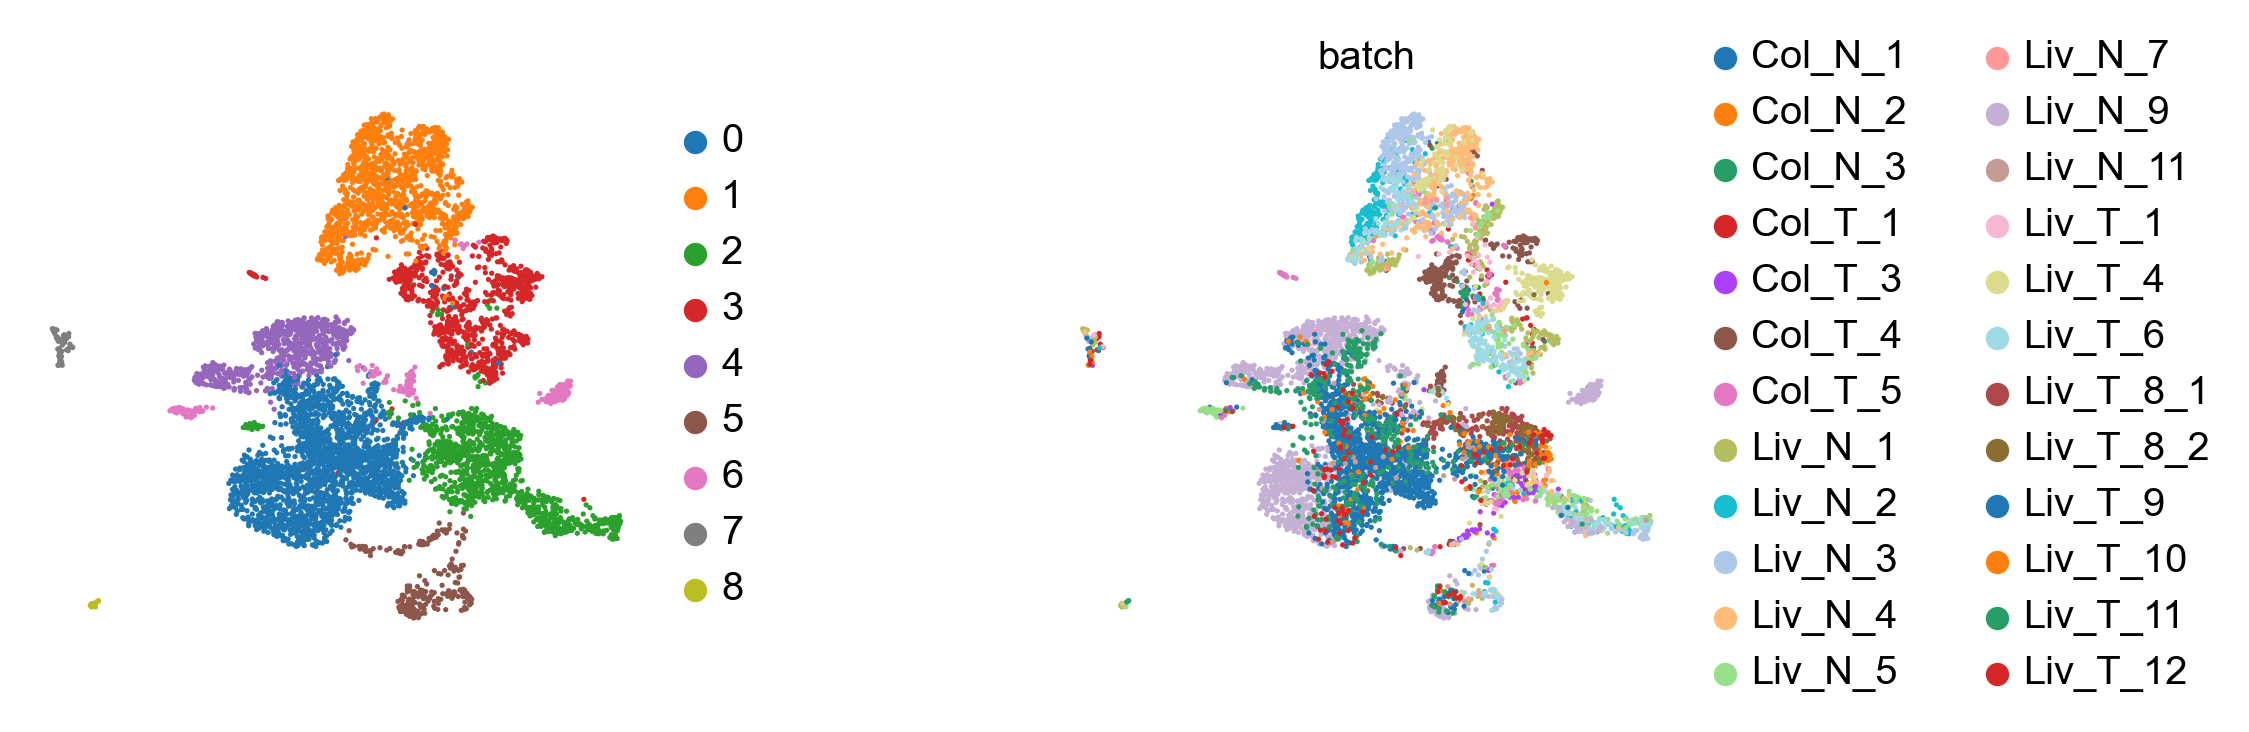

In [78]:
with rc_context({'figure.figsize': (3, 3), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color=['louvain_2nd', 'batch'], title='', size=10, wspace=0.5, legend_fontsize=12, frameon=False, legend_loc='right margin', show=True)

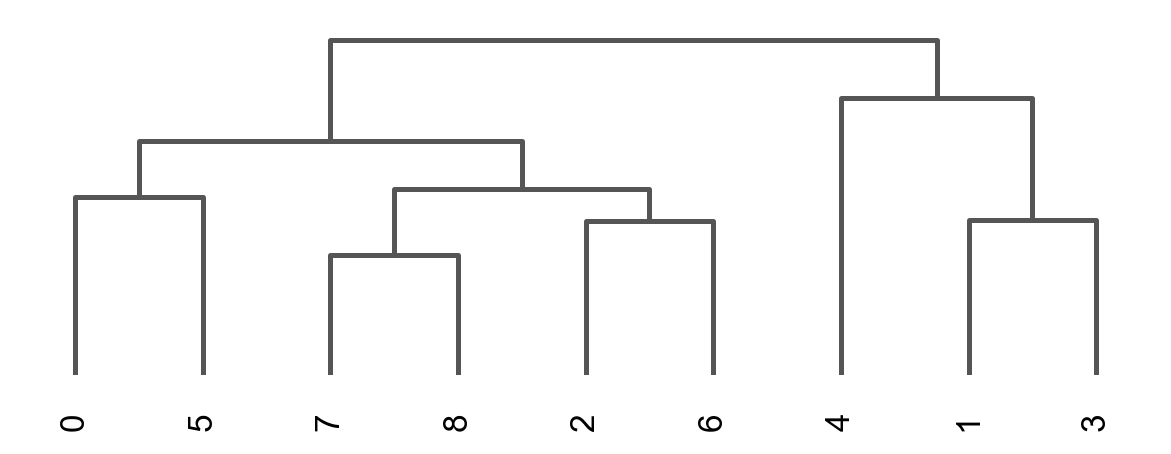

In [79]:
with rc_context({'figure.figsize': (6, 2), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.tl.dendrogram(adata, groupby = 'louvain_2nd', cor_method='pearson')
    ax = sc.pl.dendrogram(adata, groupby = 'louvain_2nd', show=True, save="_01_louvain_2nd_cluster.pdf")
    # ax = sc.pl.correlation_matrix(adata, 'louvain_2nd', figsize=(10, 9), show=True, save="_01_correlation.pdf")

## Marker genes

### Myeloid cell clusters

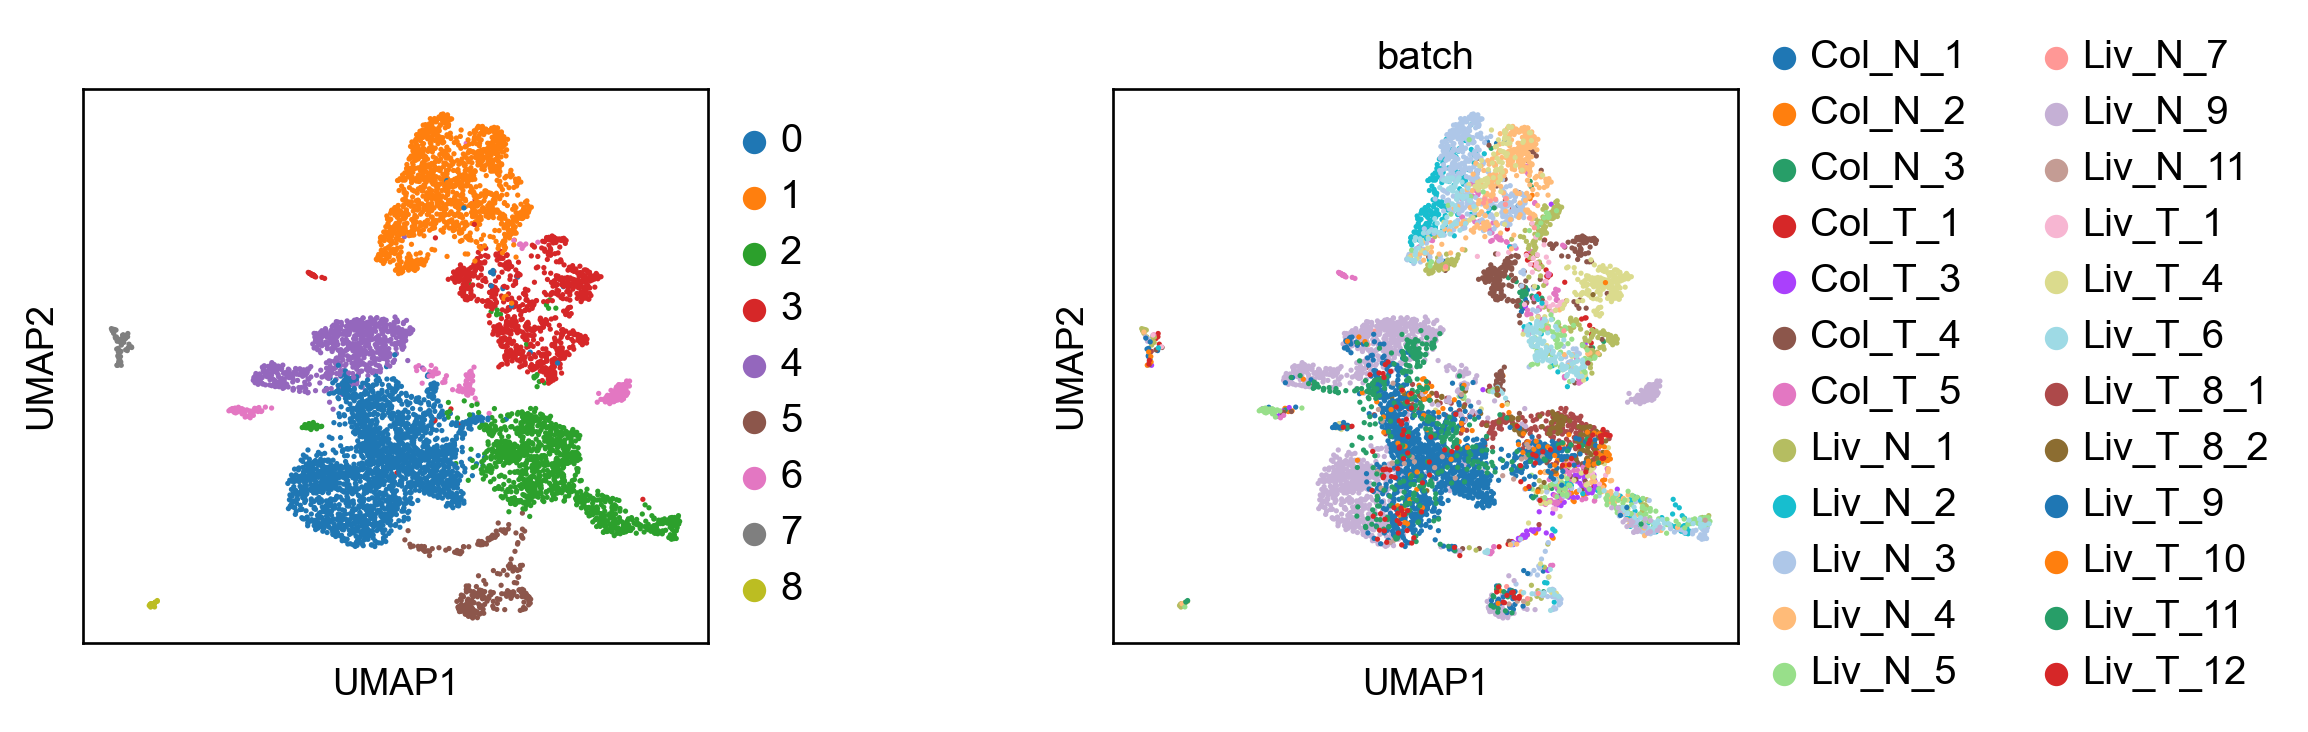

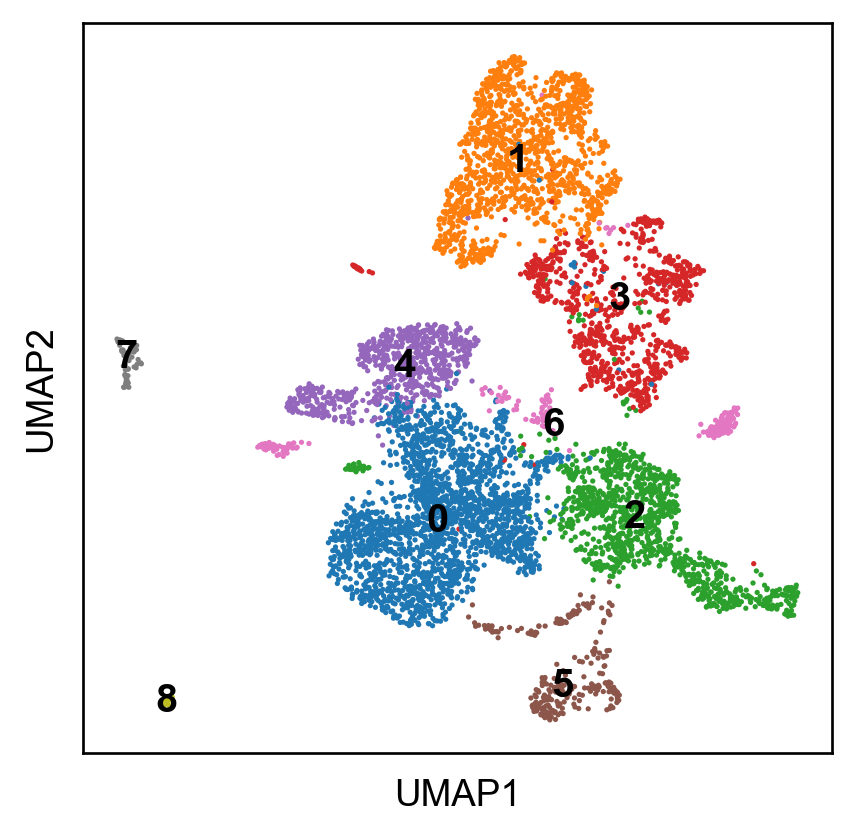

In [80]:
with rc_context({'figure.figsize': (3, 3), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color=['louvain_2nd', 'batch'], title='', size=10, wspace=0.5, legend_fontsize=12, frameon=True, legend_loc='right margin', show=True)

with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color = ['louvain_2nd'], title='', size=10, legend_loc='on data', legend_fontsize=12, frameon=True, wspace=0.5, show=True)

In [81]:
adata.obs['Myeloid_cluster'] = adata.obs['louvain_2nd'].replace(
    ['0', '1', '2', '3', '4',
    '5', '6', '7', '8'
    ],
    ['Macrophage', 'Monocytes', 'Macrophage', 'Macrophage', 'Monocytes',
    'Dendritic cells', 'Macrophage', 'Mast cells', 'Mast cells'
    ])

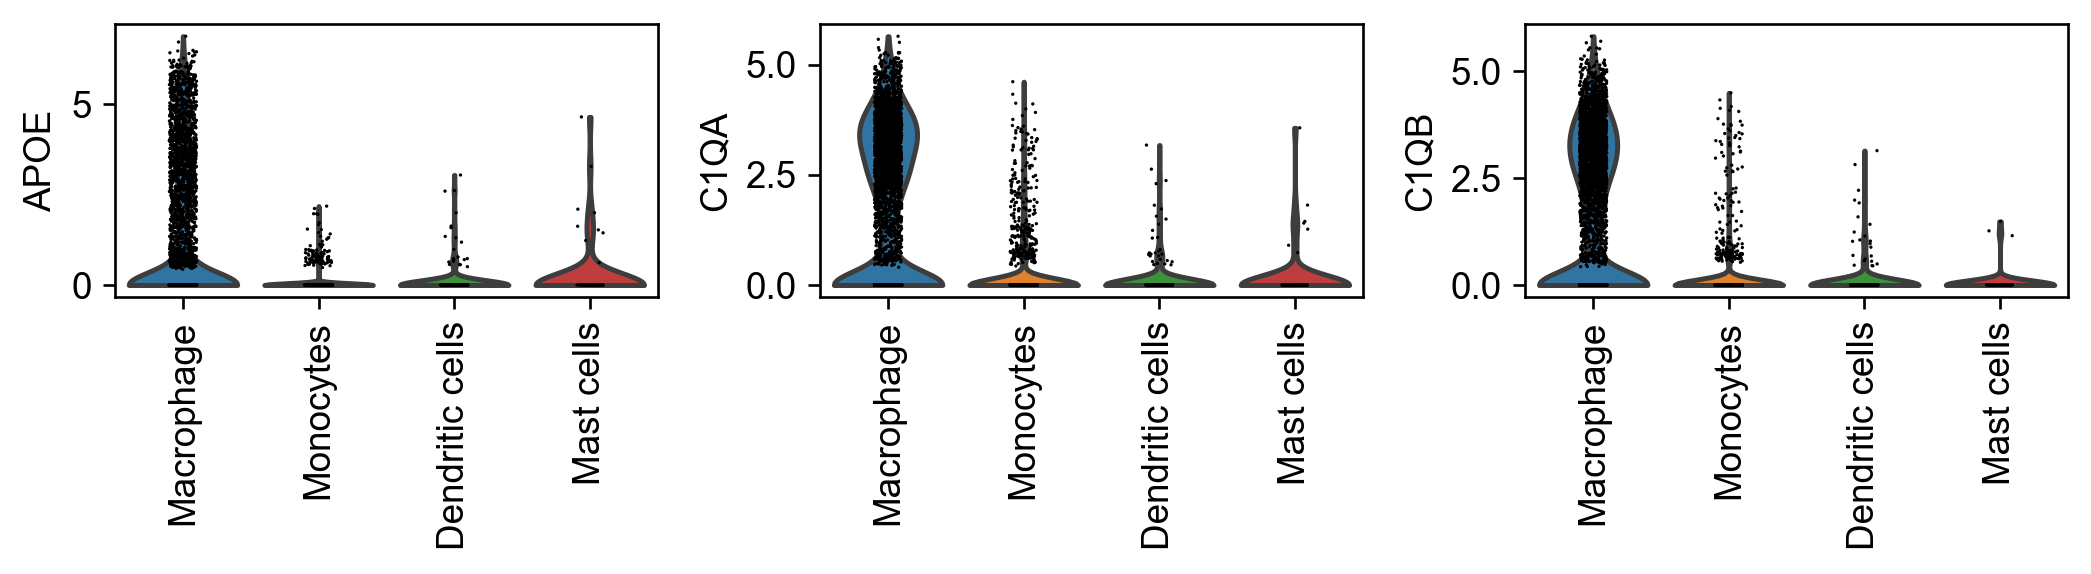

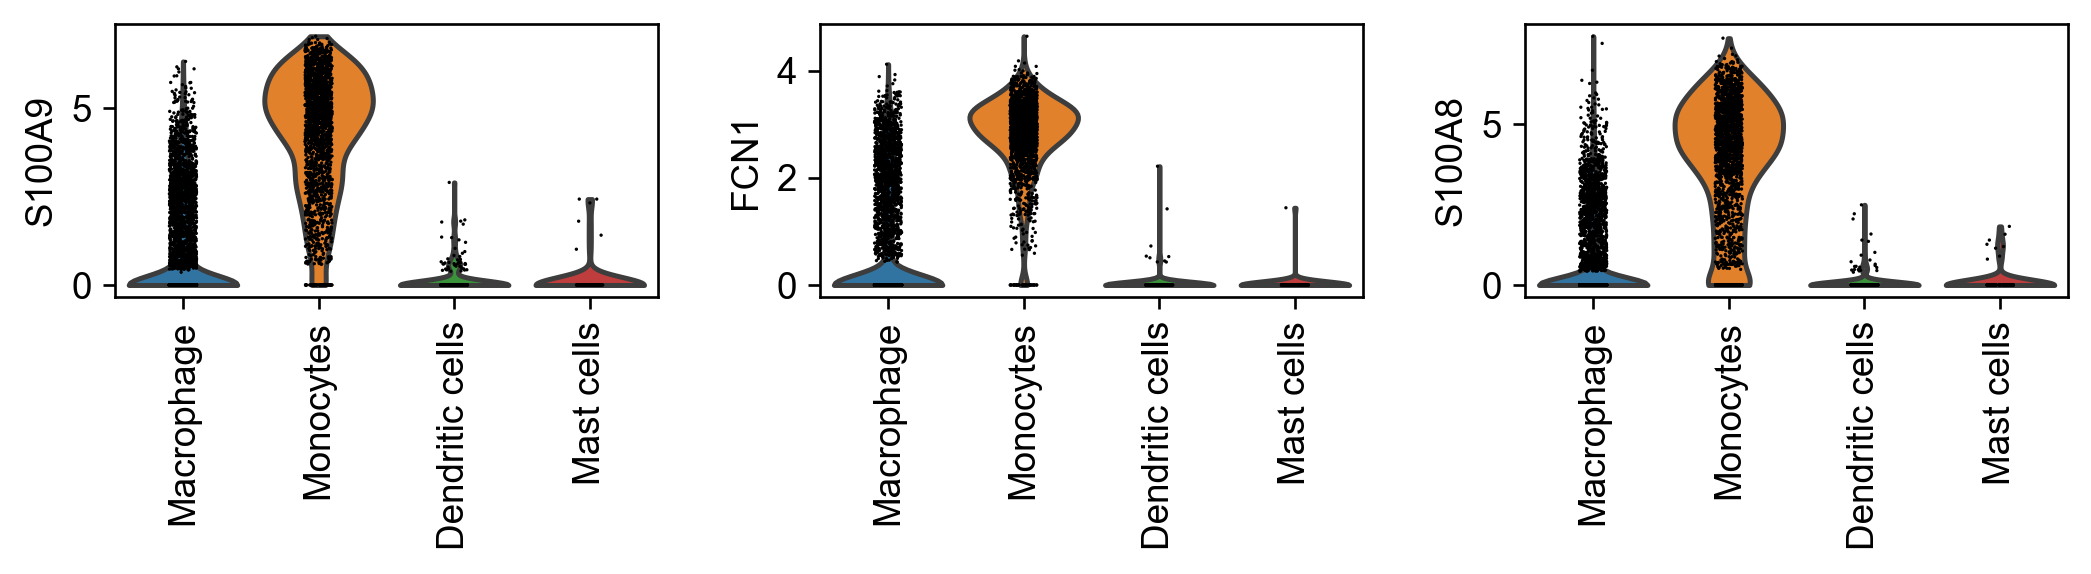

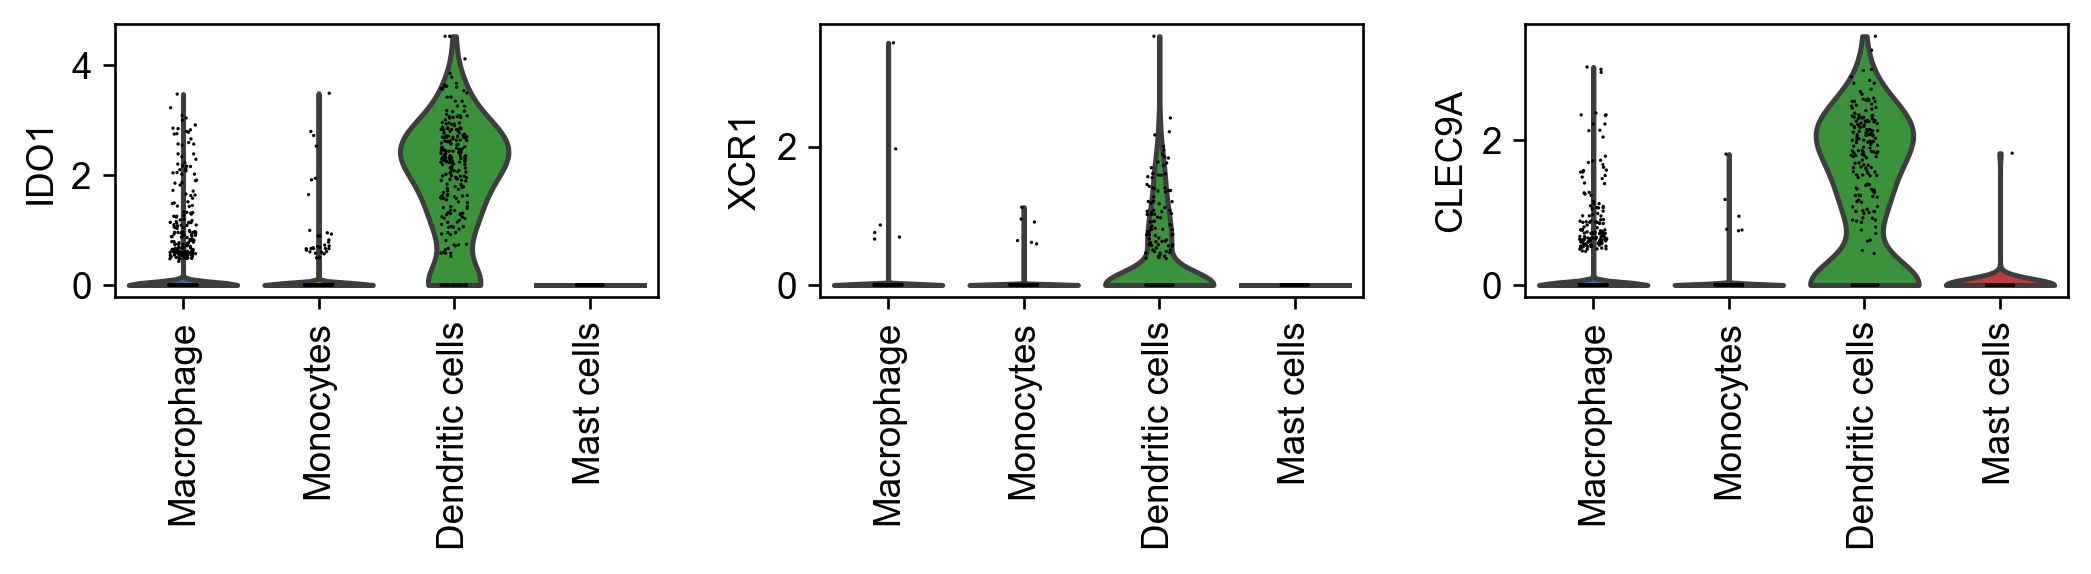

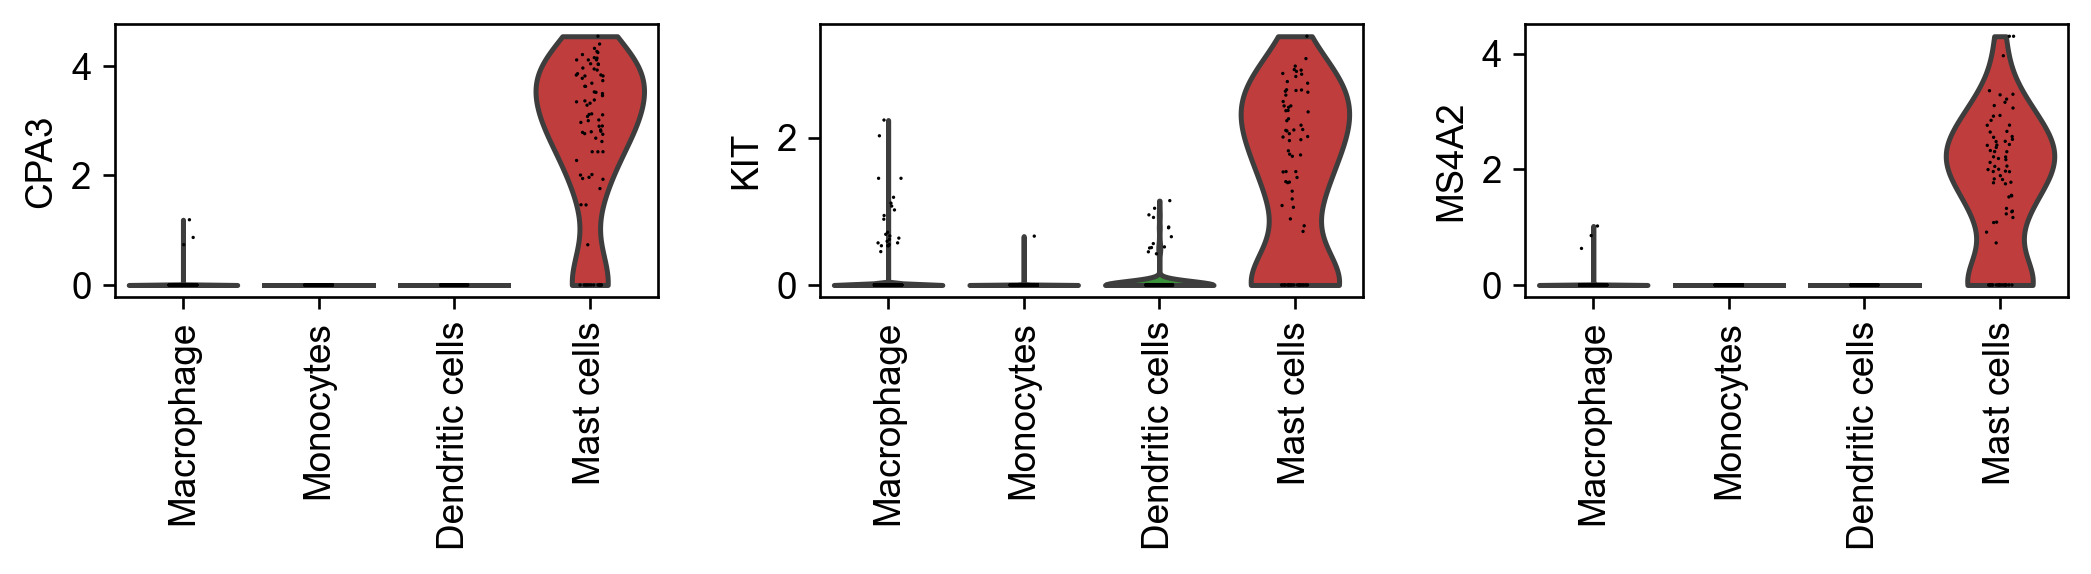

In [82]:
with rc_context({'figure.figsize': (3.5, 1.5), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.violin(adata, ['APOE', 'C1QA', 'C1QB'], groupby='Myeloid_cluster', rotation=90, swap_axes=True, show=True)
    sc.pl.violin(adata, ['S100A9', 'FCN1', 'S100A8'], groupby='Myeloid_cluster', rotation=90, swap_axes=True, show=True)
    sc.pl.violin(adata, ['IDO1', 'XCR1', 'CLEC9A'], groupby='Myeloid_cluster', rotation=90, swap_axes=True, show=True)
    sc.pl.violin(adata, ['CPA3', 'KIT', 'MS4A2'], groupby='Myeloid_cluster', rotation=90, swap_axes=True, show=True)

In [83]:
adata.obs['Myeloid_cluster'].cat.categories

Index(['Macrophage', 'Monocytes', 'Dendritic cells', 'Mast cells'], dtype='object')

In [84]:
# adata.obs['Myeloid_cluster'].cat.reorder_categories(
#     ['Myeloid cells', 'Mast cells', 'Monocytes'], inplace=True, ordered=True)
# adata.obs['Myeloid_cluster'].cat.categories
# # ['Myeloid cells', 'Mast cells', 'Monocytes', 'Monocytes', 'MDSC', 'M1', 'M2', 'M2-like', 'cDC1', 'cDC2', 'pDC'], inplace=True, ordered=True)

## Save Myeloid cell clusters

In [85]:
adata.obs['Myeloid_cluster'].cat.categories

Index(['Macrophage', 'Monocytes', 'Dendritic cells', 'Mast cells'], dtype='object')

In [86]:
# adata.obs['Myeloid_cluster'].cat.reorder_categories(
#     ['Macrophage', 'Monocytes', 'Dendritic cells', 'Mast cells'], inplace=True, ordered=True)
# adata.obs['Myeloid_cluster'].cat.categories

In [87]:
adata.obs['Myeloid_cluster'].value_counts()

Macrophage         4319
Monocytes          1970
Dendritic cells     260
Mast cells           78
Name: Myeloid_cluster, dtype: int64

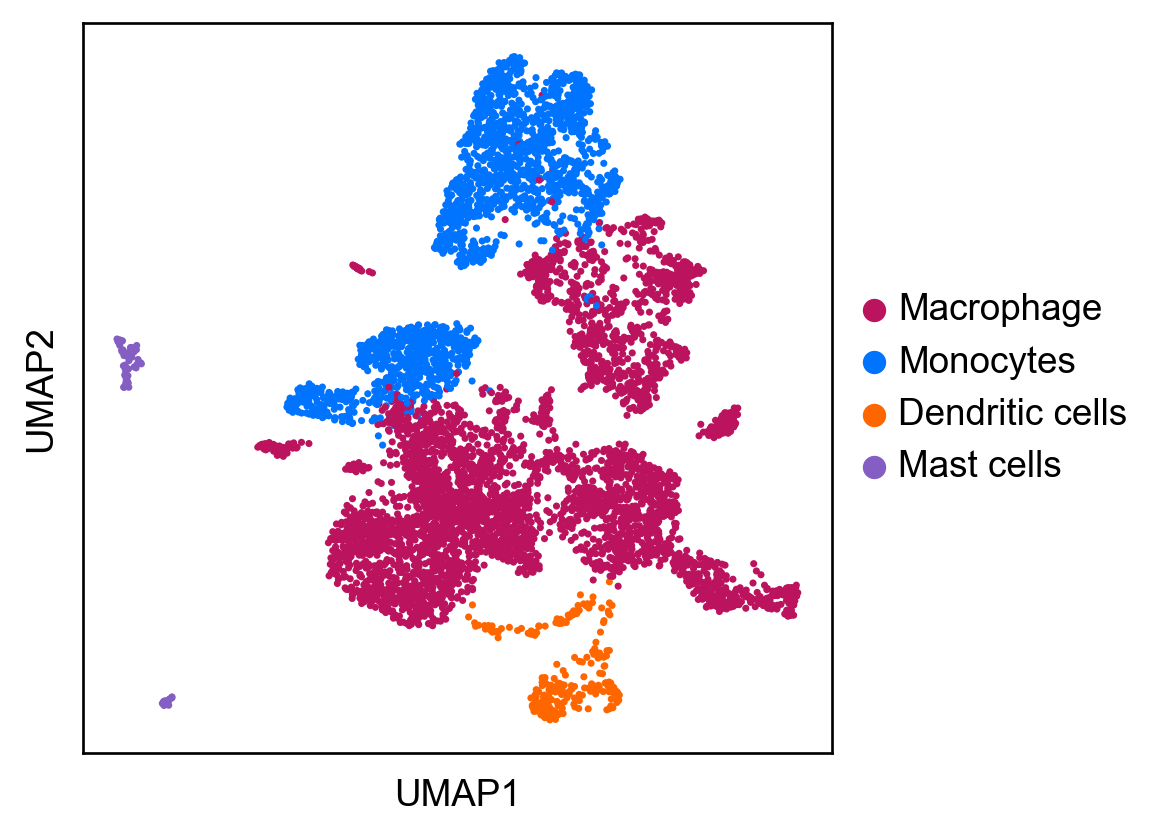

['#bb135d', '#0073ff', '#ff6600', '#845ec2']

In [88]:
with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color=['Myeloid_cluster'], legend_loc='right margin', title='', palette=['#BB135D', '#0073FF', '#FF6600', '#845EC2'], show=True, save='_01_Myeloid_cluster_v1.pdf')

adata.uns['Myeloid_cluster_colors']

In [ ]:
adata.write_h5ad('/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/write/CRC_31_Myeloid.h5ad')

## DEGs in Myeloid cells

In [90]:
adata = sc.read('/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/write/CRC_31_Myeloid.h5ad')

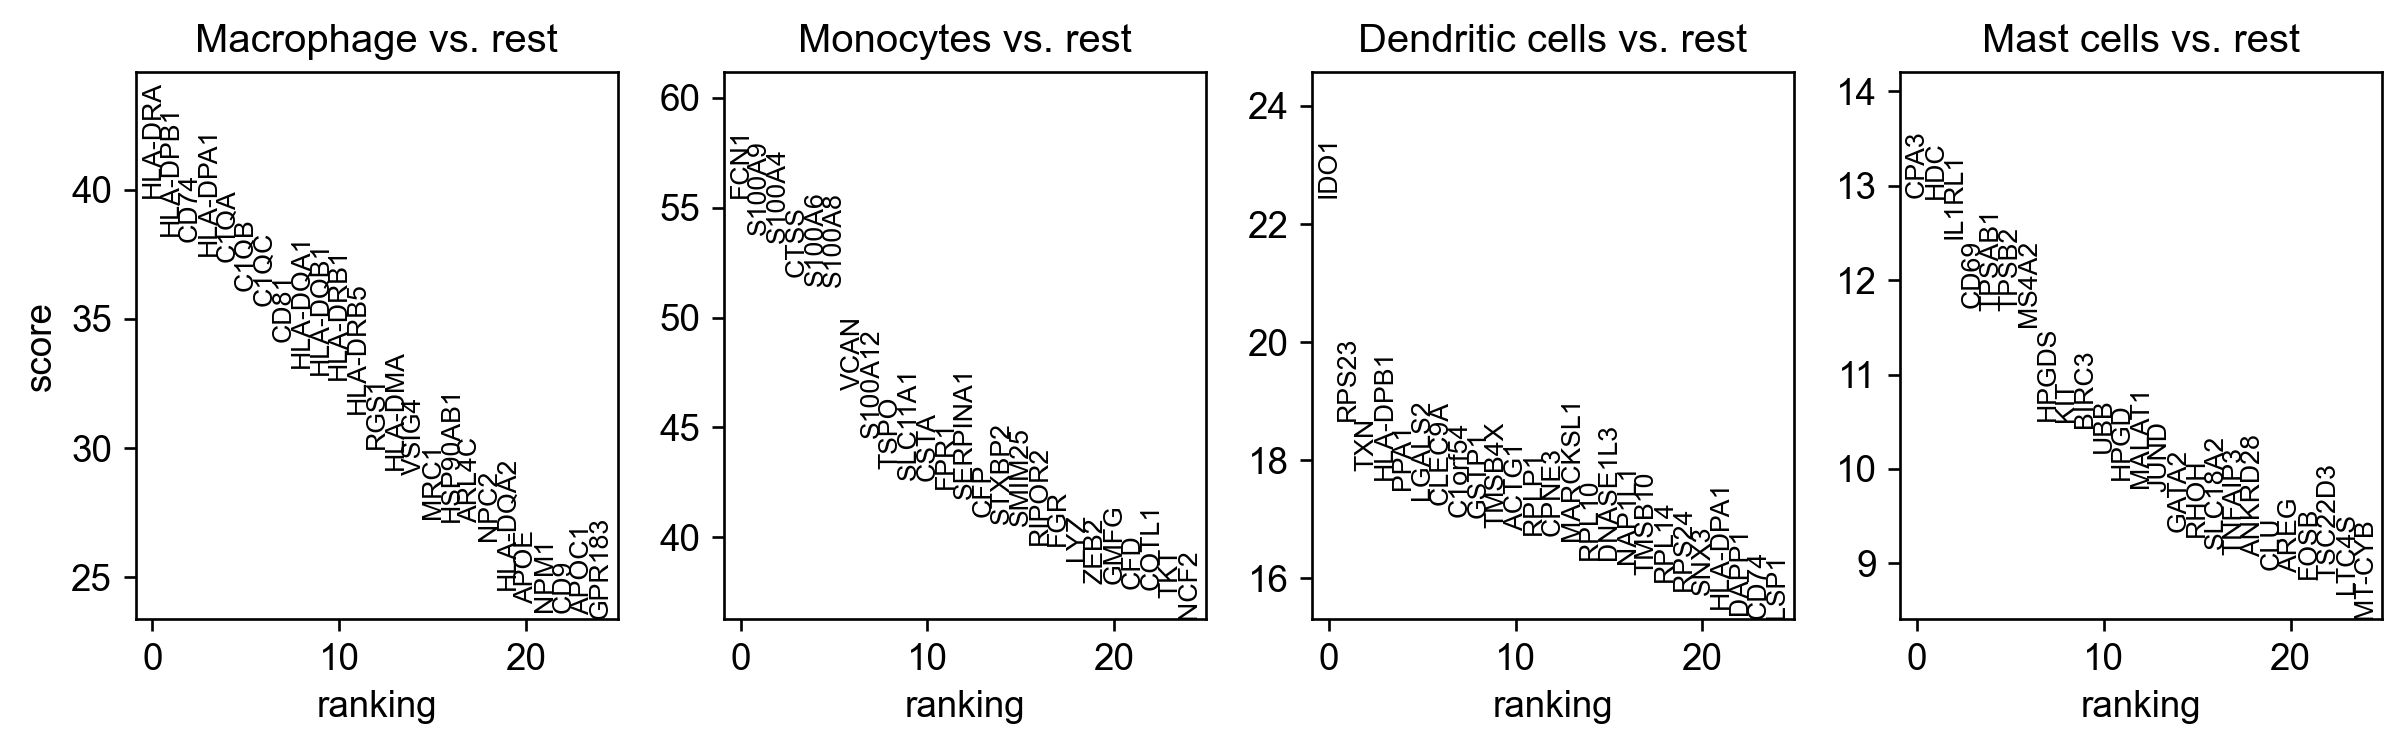

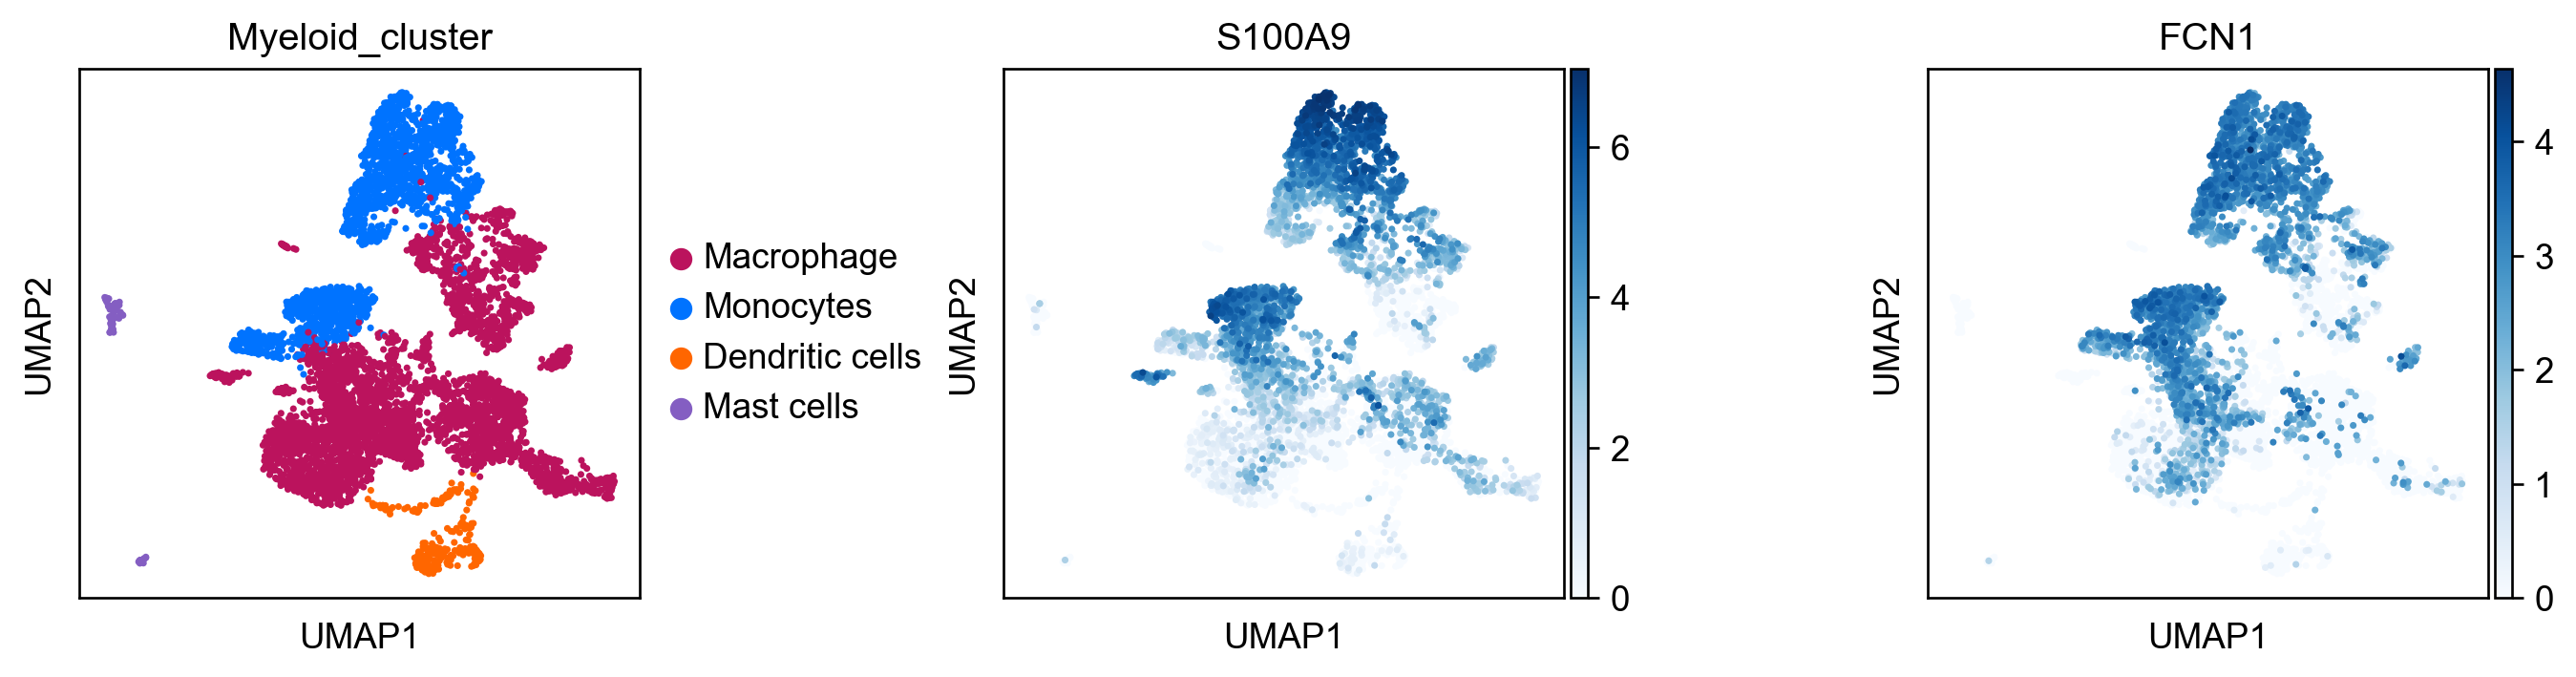

In [91]:
sc.pp.log1p(adata)

sc.tl.rank_genes_groups(adata, 'Myeloid_cluster', method='wilcoxon', pts=True)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, show=True)

res = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(500)
res.to_csv("/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/31_Myeloid_Figures/diff_top500.csv")

sc.pl.umap(adata, color=['Myeloid_cluster', 'S100A9', 'FCN1'], cmap='Blues', legend_loc='right margin', wspace=0.5, show=True)
# sc.pl.umap(adata, color=['majority_voting', 'TPSAB1', 'KIT'], cmap='Blues', legend_loc='right margin', wspace=0.8, show=True)

In [92]:
# from cycler import cycler
# with rc_context({'figure.figsize': (10, 3), 'figure.facecolor': '#FFFFFF', 'savefig.dpi': '300', 'axes.grid': 'False', 'legend.loc':'best',
# 'axes.prop_cycle': cycler(color=['#ff502f', '#3366CC']), 'axes.labelcolor': '#000000', }):
#     sc.pl.rank_genes_groups_violin(adata, groups=['Monocytes', 'Macrophage'], n_genes=20, strip=False, jitter=0, show=True)
#     # sc.tl.rank_genes_groups(adata, 'louvain_NK', groups=['NK2'], reference='NK1', method='wilcoxon')
#     # sc.pl.rank_genes_groups_violin(adata, groups='NK2', n_genes=10, strip=False, jitter=0, show=True)

In [93]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

res = pd.DataFrame(    
    {group + '_' + key: result[key][group]
     for group in groups for key in ['names', 'pvals', 'logfoldchanges', 'pvals_adj', 'scores']})
res.to_csv("/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/31_Myeloid_Figures/DEGs_all.csv")

In [94]:
res = sc.get.rank_genes_groups_df(adata, group='Macrophage')
res.to_csv("diff_Macrophage_df.csv")

from gprofiler import GProfiler
res = sc.queries.enrich(adata, "Macrophage")
res.to_csv("diff_Macrophage_enrich.csv")

In [95]:
res = sc.get.rank_genes_groups_df(adata, group='Monocytes')
res.to_csv("diff_Monocytes_df.csv")

from gprofiler import GProfiler
res = sc.queries.enrich(adata, "Monocytes")
res.to_csv("diff_Monocytes_enrich.csv")

In [ ]:
res = sc.get.rank_genes_groups_df(adata, group='Dendritic cells')
res.to_csv("diff_Dendritic_cells_df.csv")

from gprofiler import GProfiler
res = sc.queries.enrich(adata, "Dendritic cells")
res.to_csv("diff_Dendritic_cells_enrich.csv")

In [ ]:
res = sc.get.rank_genes_groups_df(adata, group='Mast cells')
res.to_csv("diff_Mast_cells_df.csv")

from gprofiler import GProfiler
res = sc.queries.enrich(adata, "Mast cells")
res.to_csv("diff_Mast_cells_enrich.csv")

In [96]:
# from cycler import cycler
# with rc_context({'figure.figsize': (6, 3), 'figure.facecolor': '#FFFFFF', 'savefig.dpi': '300', 'axes.grid': 'False', 'legend.loc':'best',
# 'axes.prop_cycle': cycler(color=['#FC6621', '#745285']), 'axes.labelcolor': '#000000', }):
#     sc.tl.rank_genes_groups(adata, 'Mac_2nd', groups=['Pro-inflammatory'], reference='Anti-inflammatory', method='wilcoxon')
#     sc.pl.rank_genes_groups_violin(adata, groups='Pro-inflammatory', n_genes=10, strip=False, jitter=0, show=True)

# res = sc.get.rank_genes_groups_df(adata, group='Pro-inflammatory')
# res.to_csv("63_Pro_and_Anti_inflammatory_df.csv")

# from gprofiler import GProfiler
# res = sc.queries.enrich(adata, "Pro-inflammatory")
# res.to_csv("63_Pro_and_Anti_inflammatory_enrich.csv")

### Only export variable gene

In [97]:
# data=adata.var.reset_index()
# data=data['index']
# marker_genes = data.values.tolist()
# # marker_genes=adata_CD8.var_names

# genedf = sc.get.obs_df(
#         adata,
#         keys=["louvain_NK", *marker_genes],
#         # use_raw=False
#     )
# grouped = genedf.groupby("louvain_NK")
# mean, sum, med, var = grouped.mean(), grouped.sum(), grouped.median(), grouped.var()

# mean = mean.T.rename(columns={'NK2':'NK2_mean', 'NK1':'NK1_mean'})
# med = med.T.rename(columns={'NK2':'NK2_median', 'NK1':'NK1_median'})
# sum = sum.T.rename(columns={'NK2':'NK2_sum', 'NK1':'NK1_sum'})
# var = var.T.rename(columns={'NK2':'NK2_var', 'NK1':'NK1_var'})

# join = pd.concat([mean, med, sum, var], axis=1)

# res = sc.get.rank_genes_groups_df(adata, group="NK2")
# res = res.set_index('names')

# exp = pd.concat([res, join], axis=1, join='outer')
# exp.to_csv("diff_NK2_variable_exp.csv")

## Figures in manuscripts

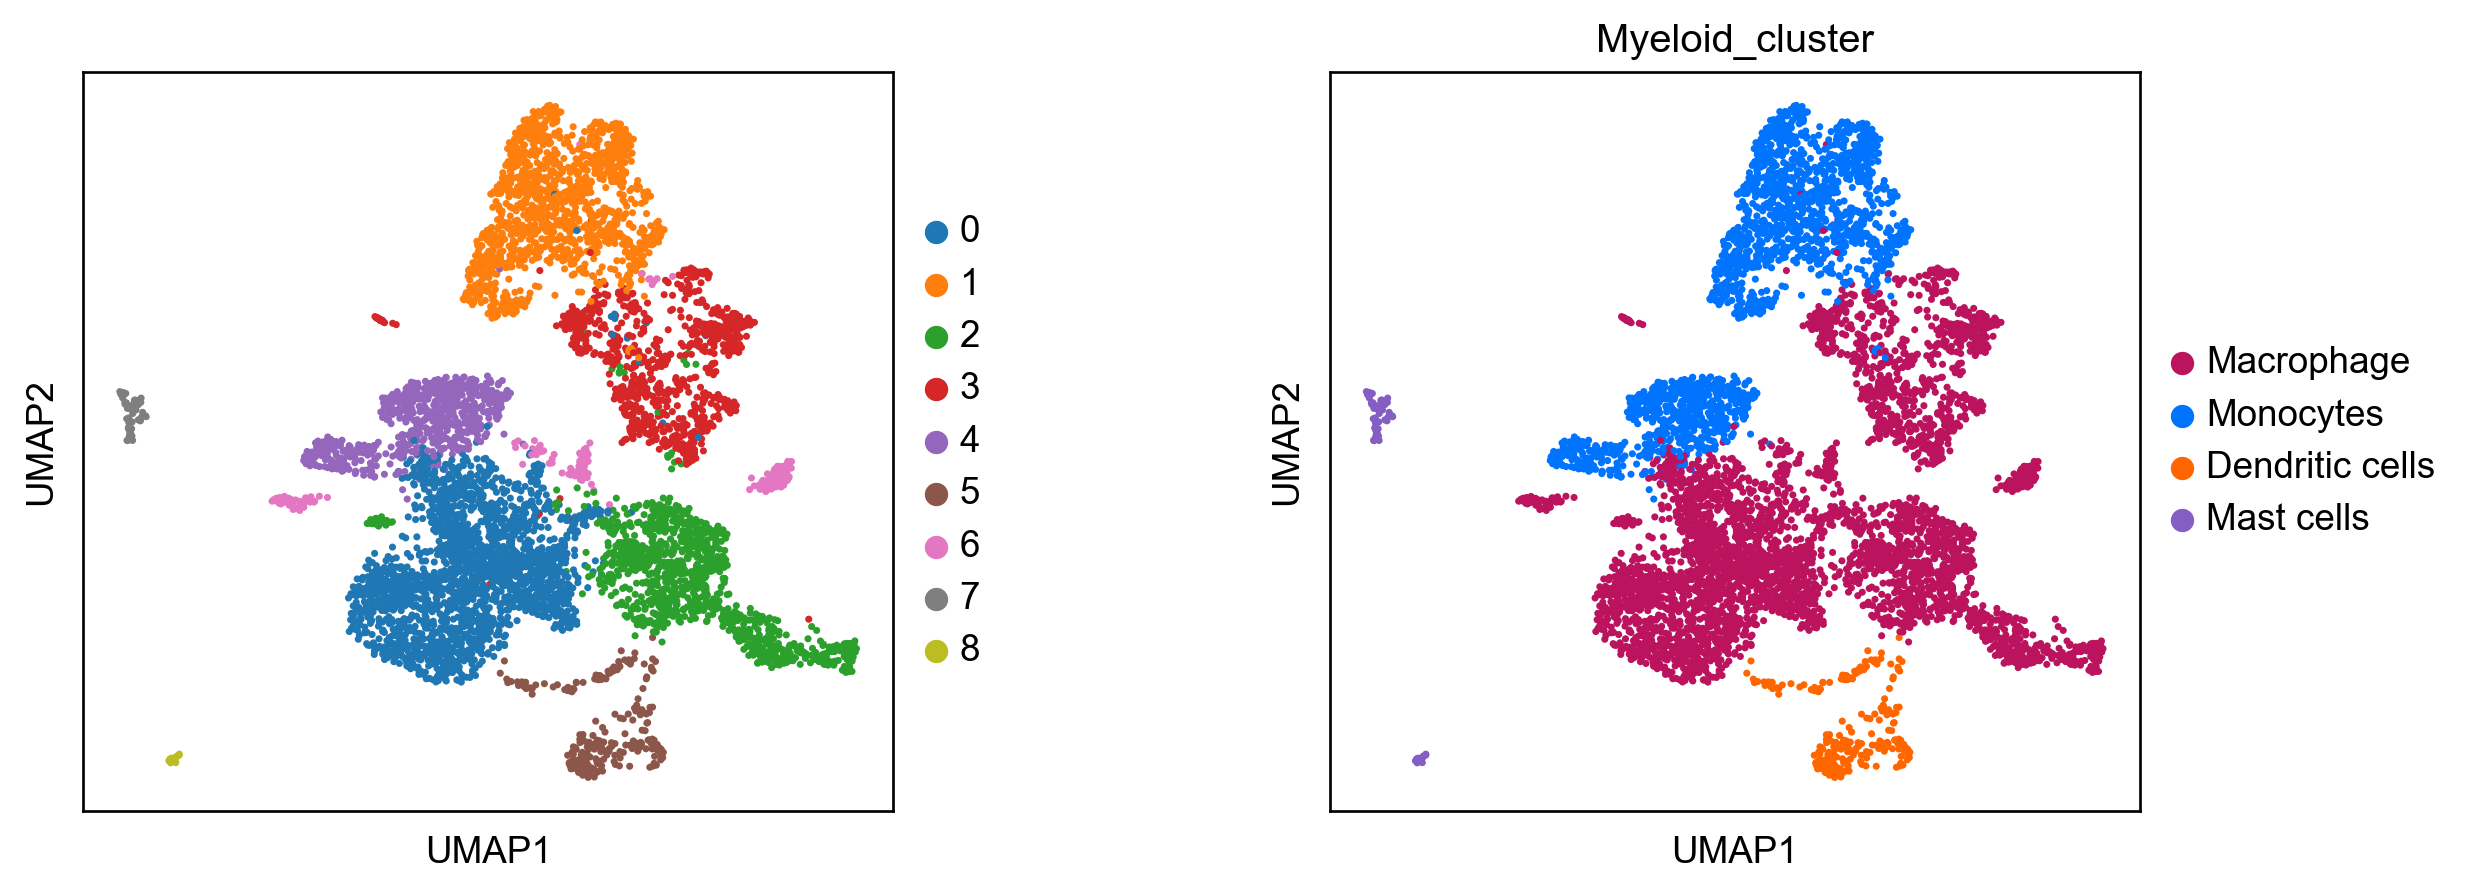

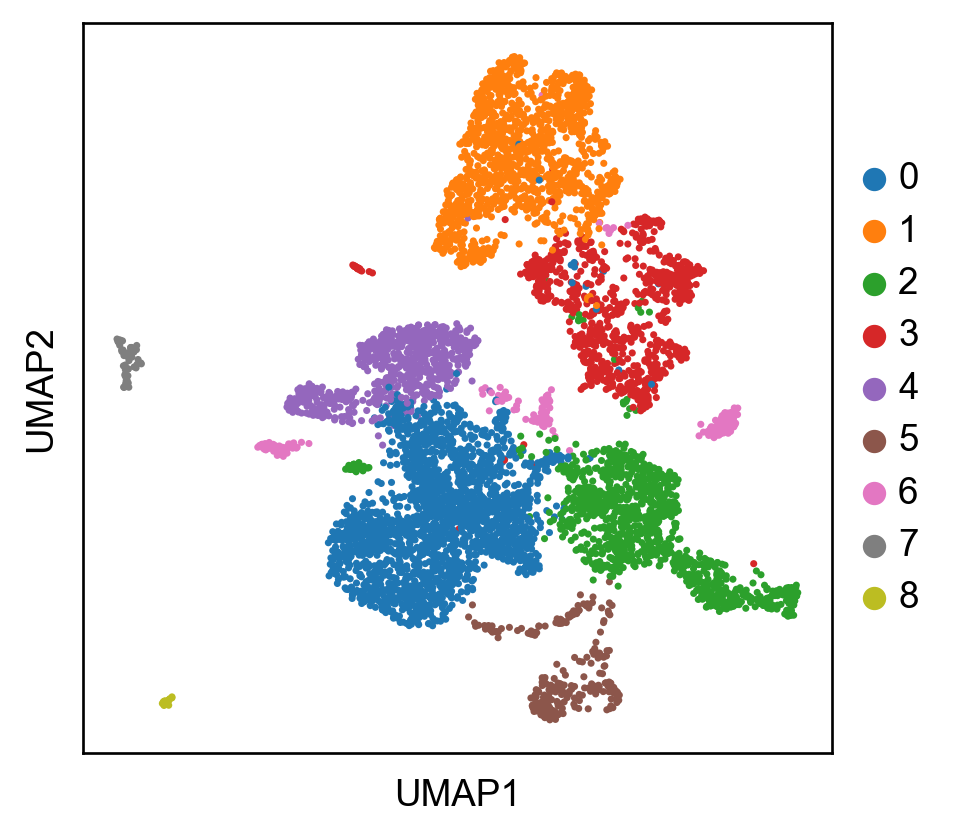

In [98]:
with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color=['louvain_2nd', 'Myeloid_cluster'], title='', ncols=2, wspace=0.4, legend_loc='right margin', show=True, save="_01_cluster_v1.pdf")
    sc.pl.umap(adata, color=['louvain_2nd'], title='', ncols=2, wspace=0.4, legend_loc='right margin', show=True, save="_01_louvain_2nd_v1.pdf")

In [99]:
marker_genes = {
    'Macrophage': ['APOE', 'C1QA', 'C1QB'],
    'Monocytes': ['S100A9', 'FCN1', 'S100A8'],
    'Dendritic cells': ['IDO1', 'XCR1', 'CLEC9A'],
    'Mast cells': ['CPA3', 'KIT', 'MS4A2'],
    }

In [100]:
# color_matrixplot_1 = mpl.colors.LinearSegmentedColormap.from_list('blue', [(0, '#FFFFFF'), (1, '#ffbb78')], N=256)

# with rc_context({'figure.figsize': (6, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
#     sc.pl.matrixplot(adata, marker_genes, groupby='louvain_NK', dendrogram=False, 
#                      cmap=color_matrixplot_1, standard_scale='var', colorbar_title='Column scaled\nexpression', show=True, save="02_NK_cluster.pdf")

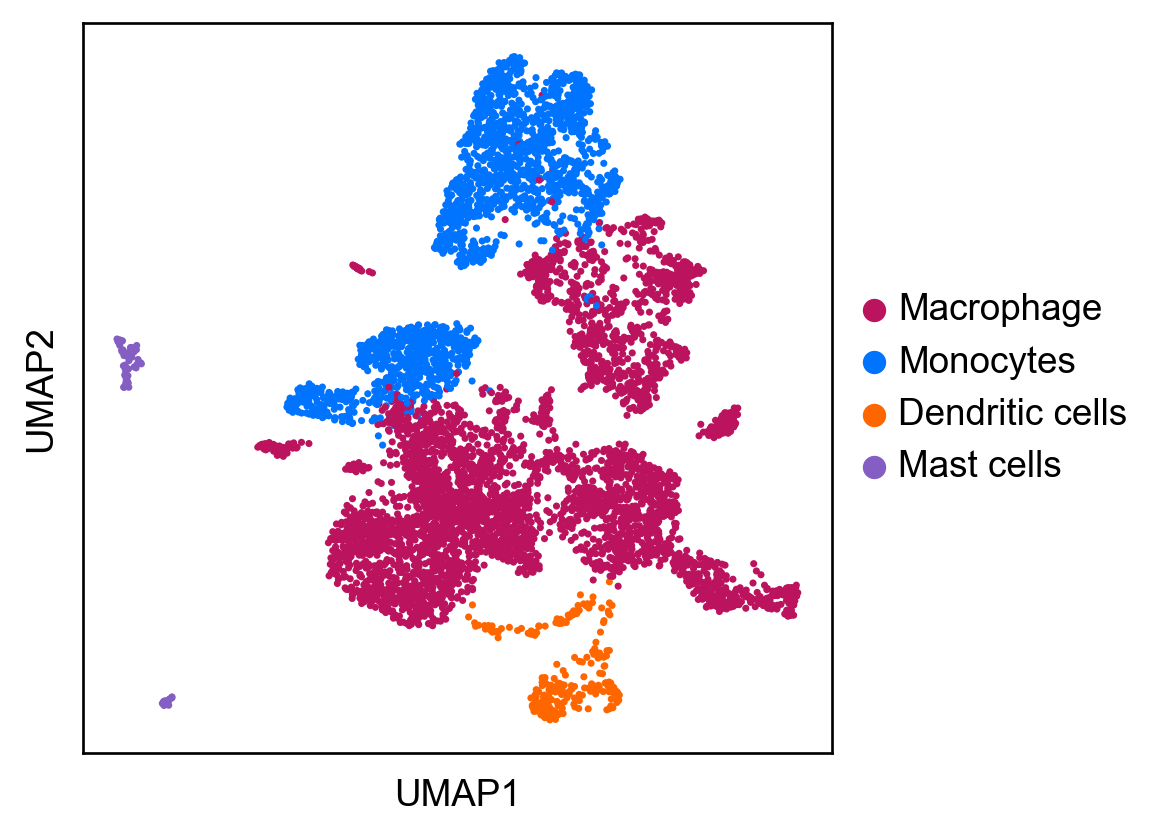

In [101]:
with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color=['Myeloid_cluster'], legend_loc='right margin', title='', show=True, save='_01_Myeloid_cluster_v2.pdf')

In [102]:
color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('blue', [(0, '#FFFFFF'), (1, '#003399')], N=256)

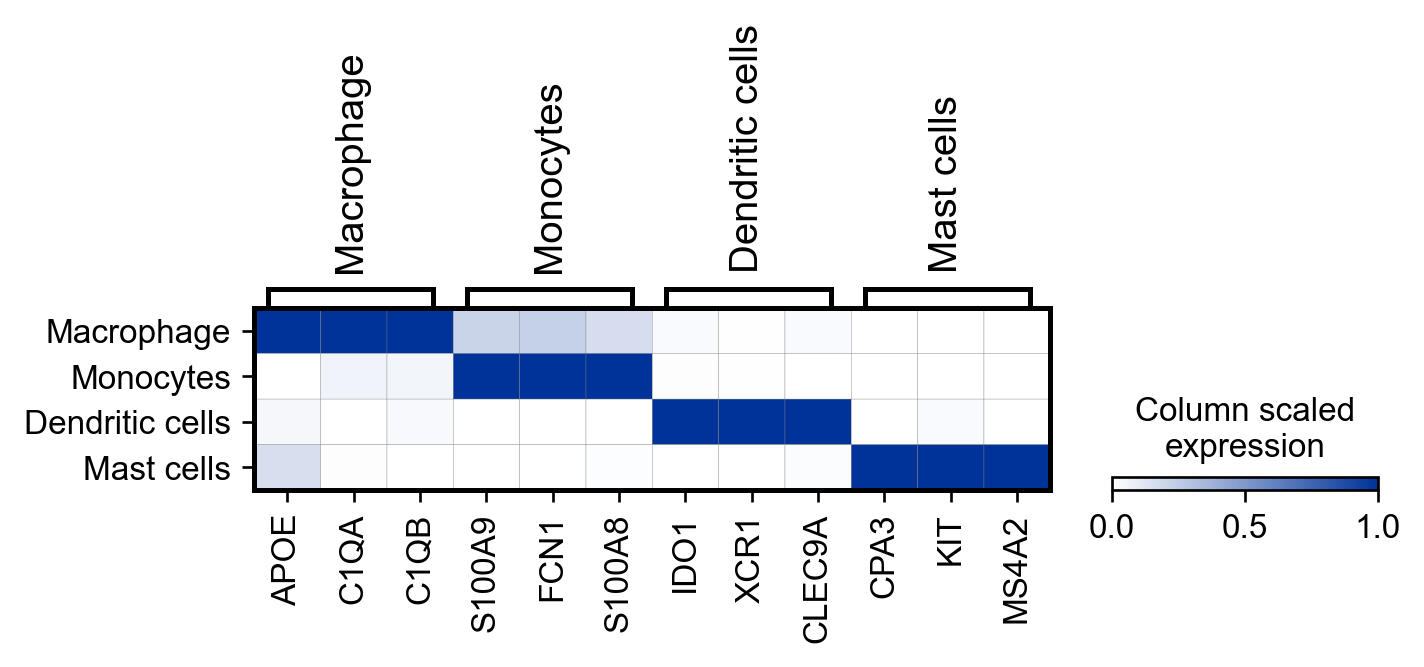

In [103]:
with rc_context({'figure.figsize': (6, 1), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.matrixplot(adata, marker_genes, 'Myeloid_cluster', dendrogram=False, cmap=color_loc_1, standard_scale='var', figsize=(6, 1),
                     colorbar_title='Column scaled\nexpression', show=True, save="01_louvain_Myeloid_v1.pdf")
    # sc.pl.matrixplot(adata, ['MARCO', 'APOE', 'FN1',
    #                          'CLEC10A', 'CD1C', 'CD1E',
    #                          'CLEC4C', 'IL3RA', 'GZMB',
    #                          'FCN1', 'S100A12', 'EREG',
    #                          'CPA3', 'KIT', 'MS4A2',], 'louvain_NK', dendrogram=False, cmap=color_loc_1, standard_scale='var', figsize=(9, 2),
    # colorbar_title='Column scaled\nexpression', show=True, save="04_louvain_NK_v2.pdf")

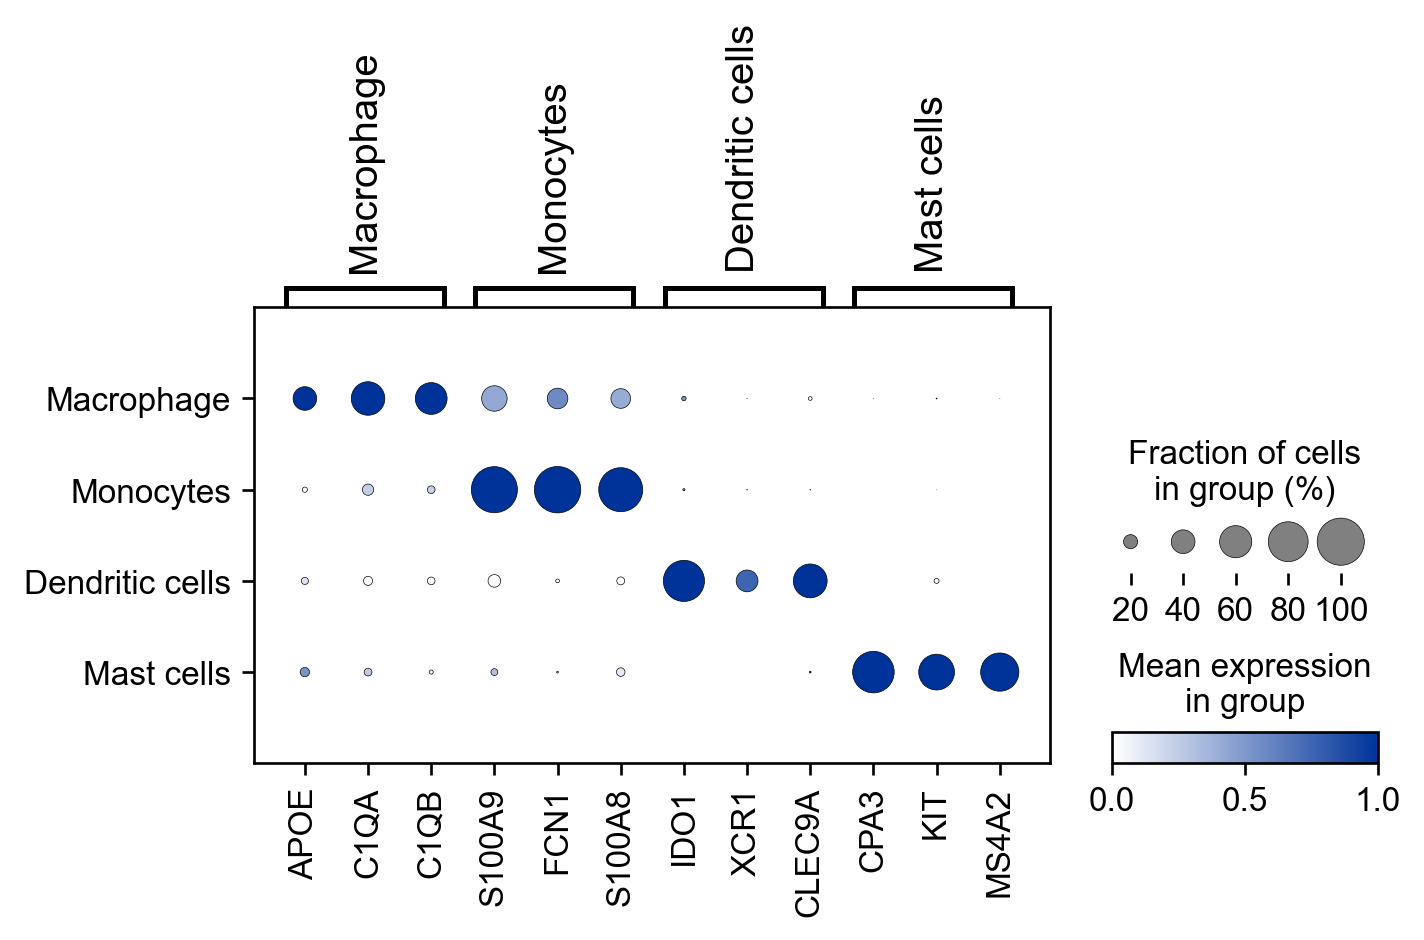

In [104]:
with rc_context({'figure.figsize': (6, 1), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.dotplot(adata, marker_genes, groupby='Myeloid_cluster', cmap=color_loc_1, swap_axes=False, dendrogram=False, figsize=(6, 2.5),
    mean_only_expressed=True, standard_scale='var', show=True, save="01_louvain_Myeloid_v1.pdf")
    # sc.pl.dotplot(adata, ['MARCO', 'APOE', 'FN1',
    #                       'CLEC10A', 'CD1C', 'CD1E',
    #                       'CLEC4C', 'IL3RA', 'GZMB',
    #                       'FCN1', 'S100A12', 'EREG',
    #                       'CPA3', 'KIT', 'MS4A2',], groupby='louvain_NK', cmap=color_loc_1, swap_axes=False, dendrogram=False, figsize=(9, 3),
    # mean_only_expressed=True, standard_scale='var', show=True, save="04_louvain_NK_v2.pdf")

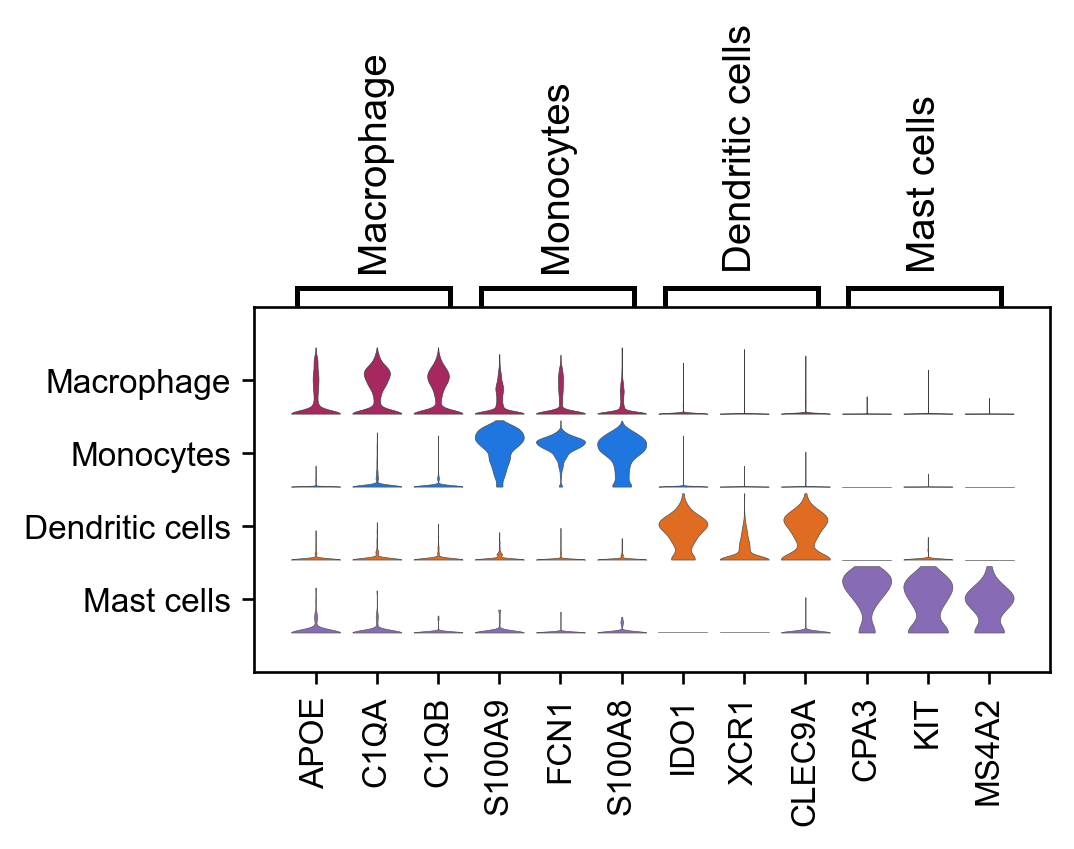

In [105]:
with rc_context({'figure.figsize': (6, 2), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.stacked_violin(adata, marker_genes, groupby='Myeloid_cluster', values_to_plot='logfoldchanges', var_group_rotation=90, rotation=0, vmax=1, vmin=-1, figsize=(6, 2),
                         row_palette=['#BB135D', '#0073FF', '#FF6600', '#845EC2'],
                         standard_scale='var', mean_only_expressed=True, swap_axes=False, dendrogram=False, show=True, save="01_louvain_Myeloid_v1.pdf")
    # sc.pl.stacked_violin(adata, ['MARCO', 'APOE', 'FN1',
    #                              'CLEC10A', 'CD1C', 'CD1E',
    #                              'CLEC4C', 'IL3RA', 'GZMB',
    #                              'FCN1', 'S100A12', 'EREG',
    #                              'CPA3', 'KIT', 'MS4A2',], groupby='louvain_NK', values_to_plot='logfoldchanges', var_group_rotation=90, rotation=0, vmax=1, vmin=-1, figsize=(9, 2),
    # row_palette=['#ff502f', '#00818A', '#8134af', '#3366CC', '#c50d66',],
    # standard_scale='var', mean_only_expressed=True, swap_axes=False, dendrogram=False, show=True, save="05_louvain_NK_v2.pdf")

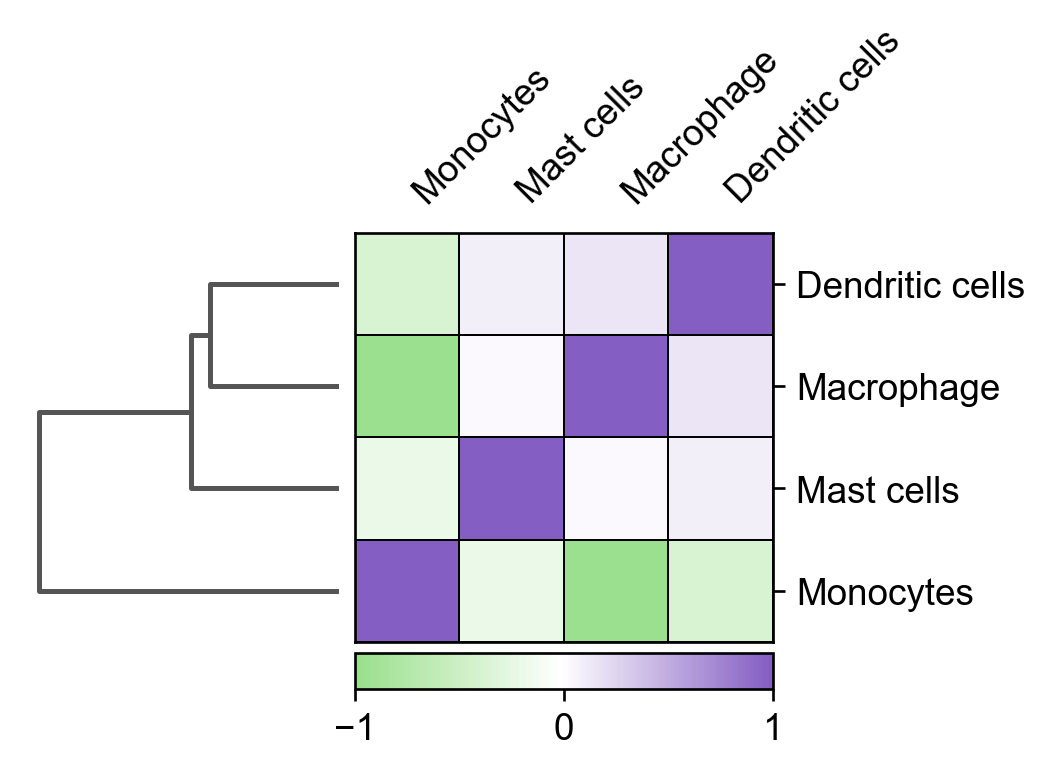

In [106]:
color_normal = mpl.colors.LinearSegmentedColormap.from_list('blue', 
                                             [(0,    '#98df8a'),
                                              (0.5,  '#FFFFFF'),
                                              (1,    '#845EC2')], N=256)
                                              
sc.tl.dendrogram(adata, 'Myeloid_cluster', n_pcs=40)
sc.pl.correlation_matrix(adata, 'Myeloid_cluster', cmap=color_normal, figsize=(4, 2.5), show=True, save='_01_louvain_Myeloid_correlation_v1.pdf')

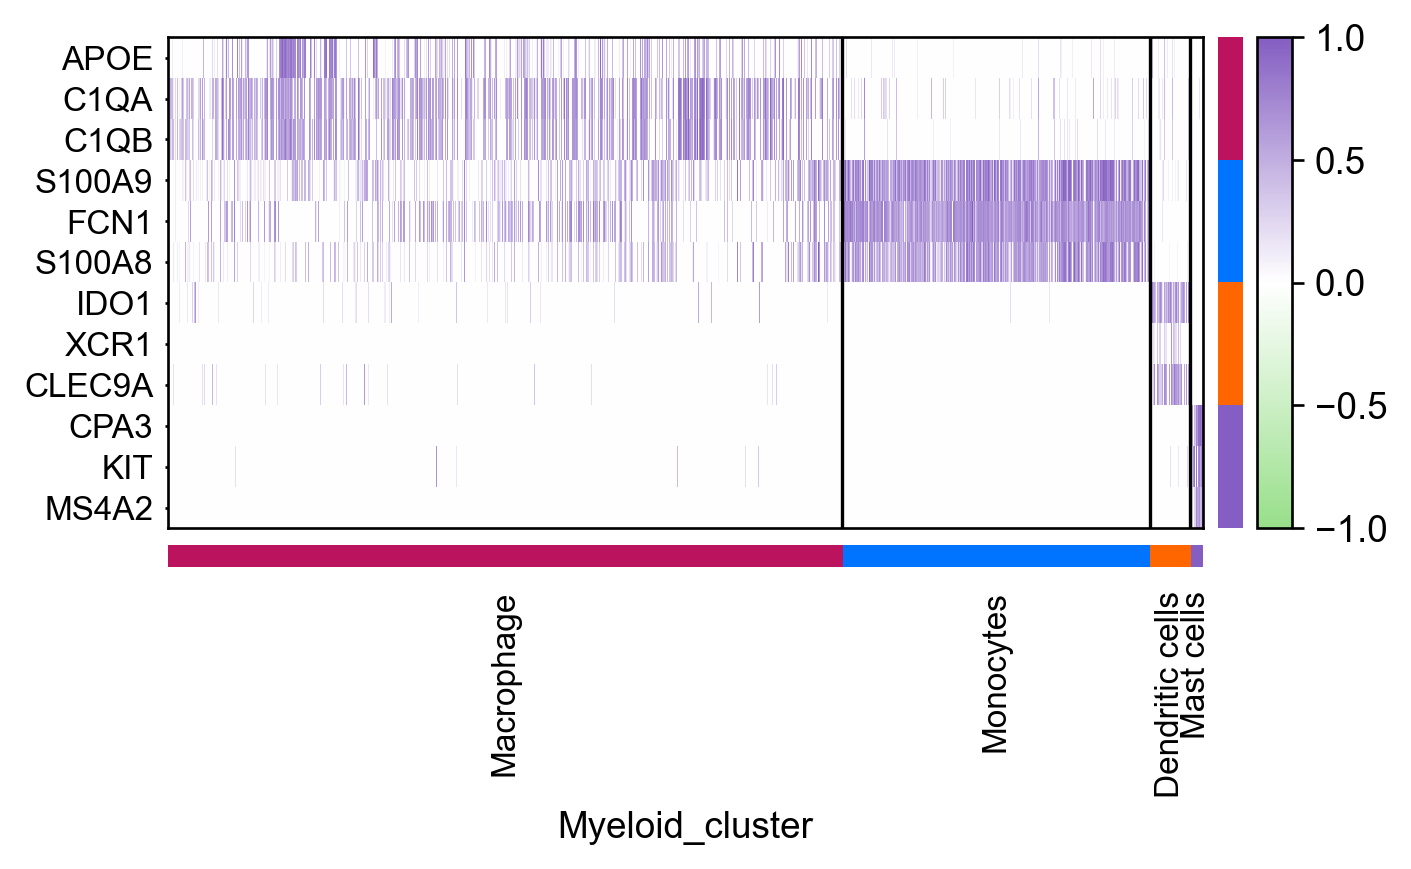

In [107]:
with rc_context({'figure.figsize': (9, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.heatmap(adata, marker_genes, groupby='Myeloid_cluster', show_gene_labels=True, figsize=(6, 3),
                  swap_axes=True, vmax=1, vmin=-1, cmap=color_normal, standard_scale='var', dendrogram=False, save='_01_louvain_Myeloid_v1.pdf')

In [108]:
adata.obs['Myeloid_cluster'].cat.categories

Index(['Macrophage', 'Monocytes', 'Dendritic cells', 'Mast cells'], dtype='object')

In [109]:
adata.uns['Myeloid_cluster_colors']

array(['#bb135d', '#0073ff', '#ff6600', '#845ec2'], dtype=object)

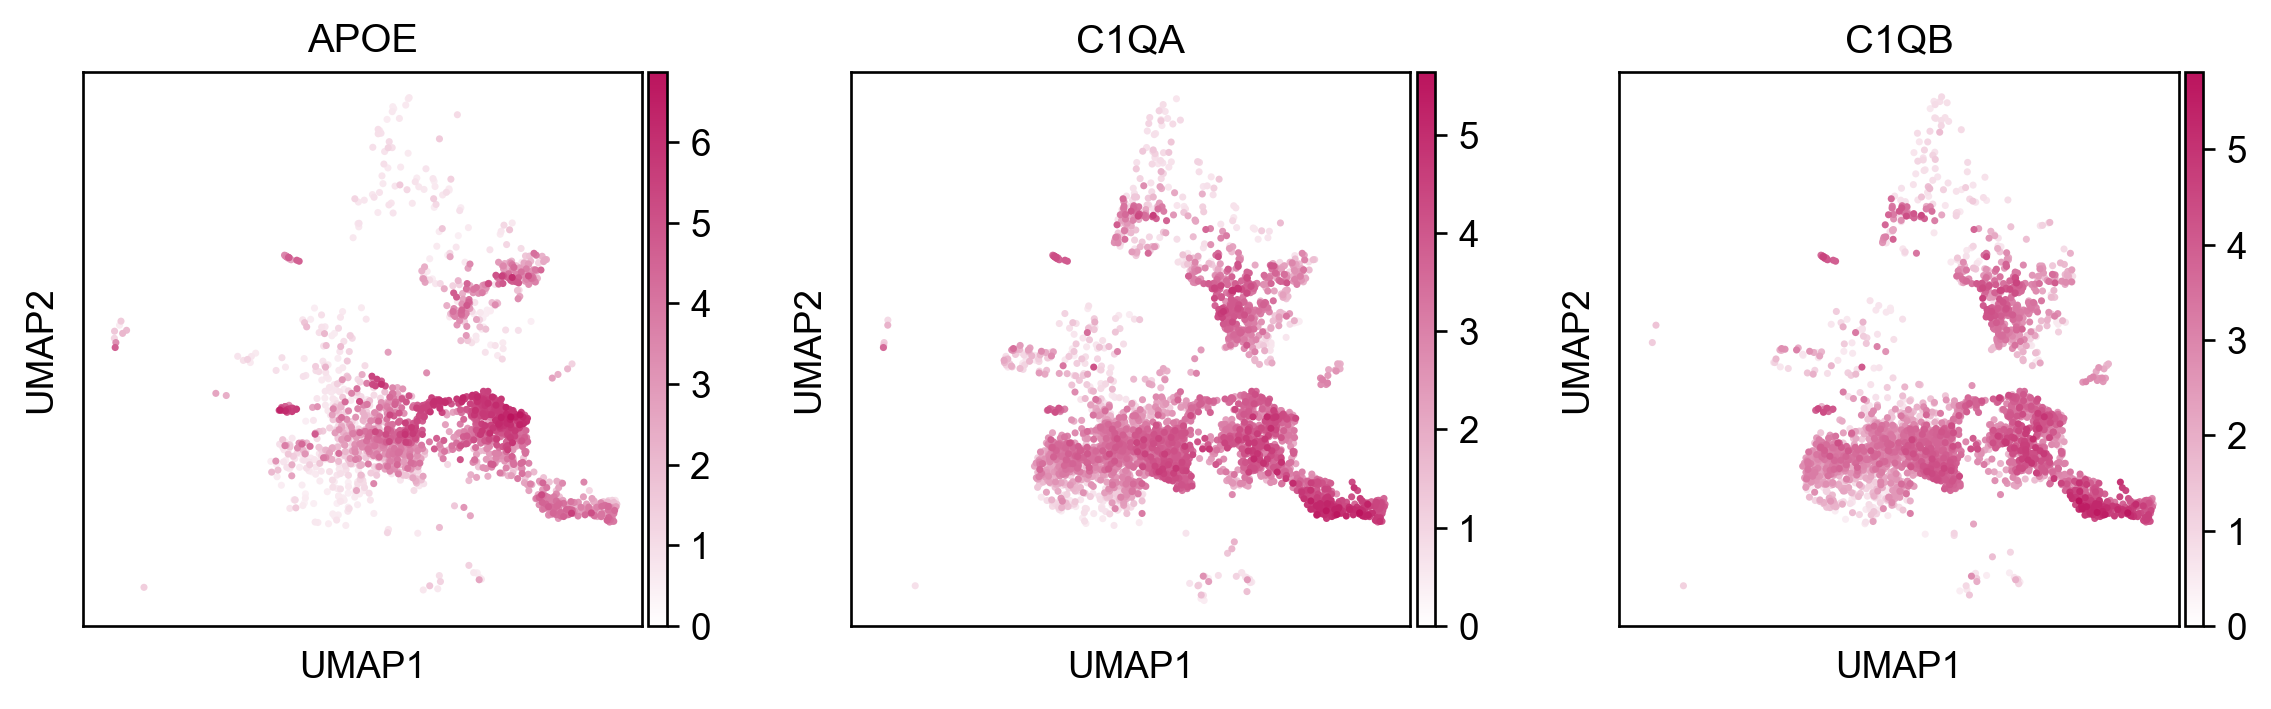

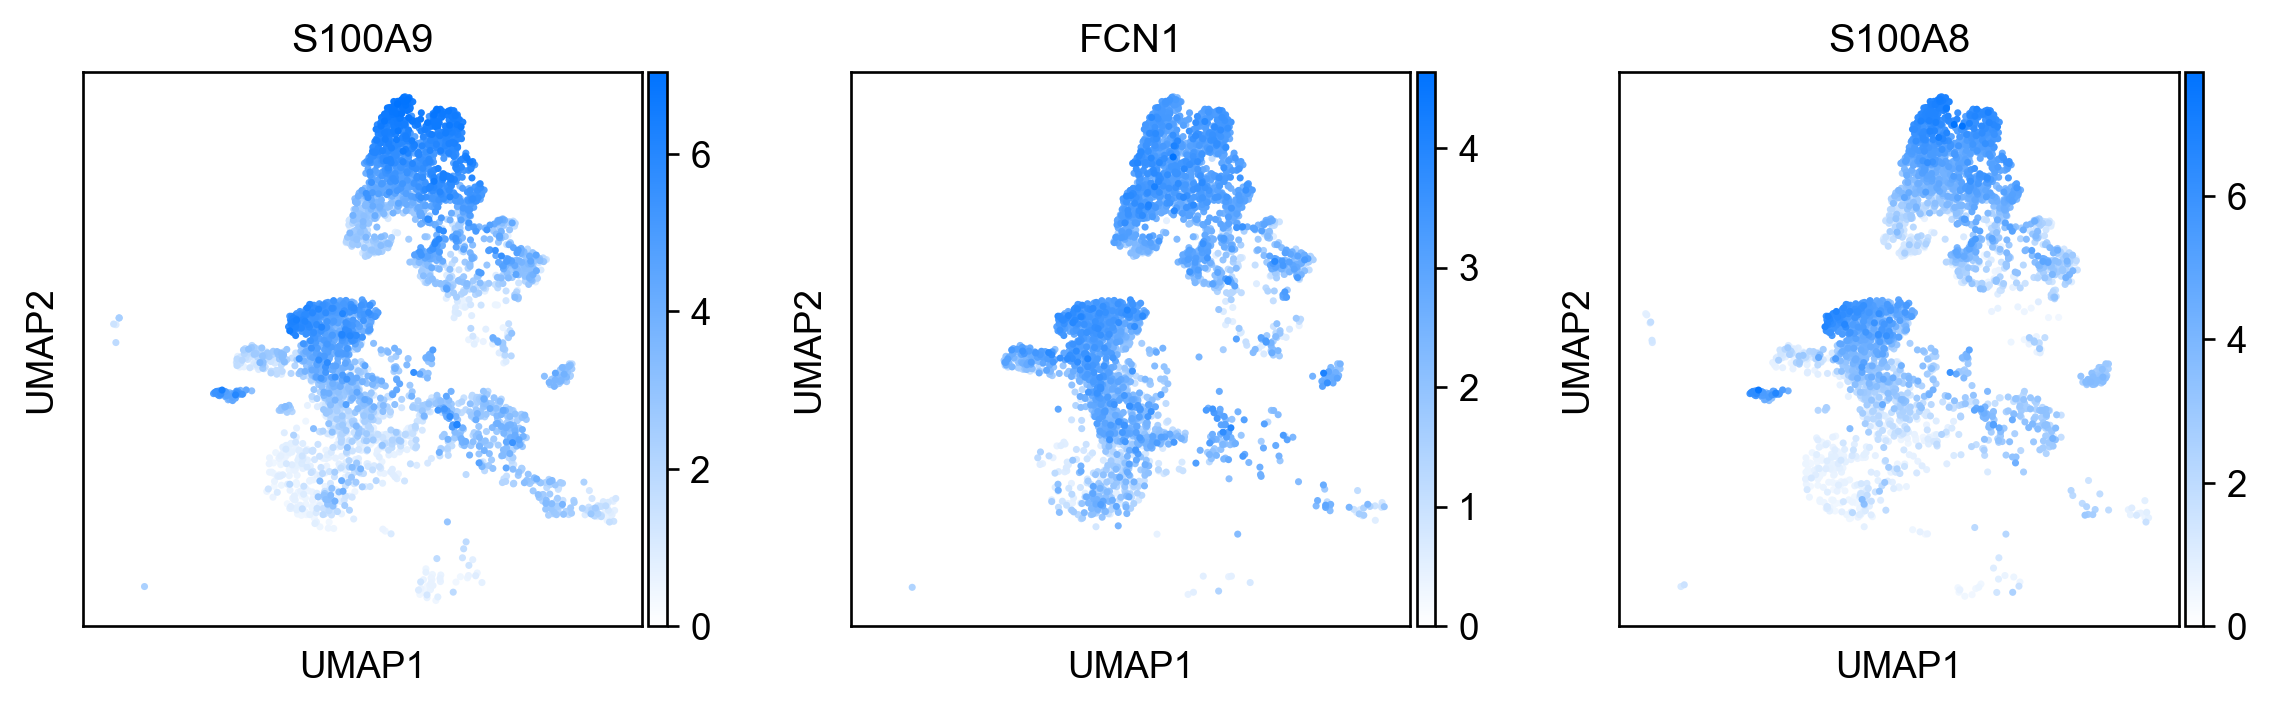

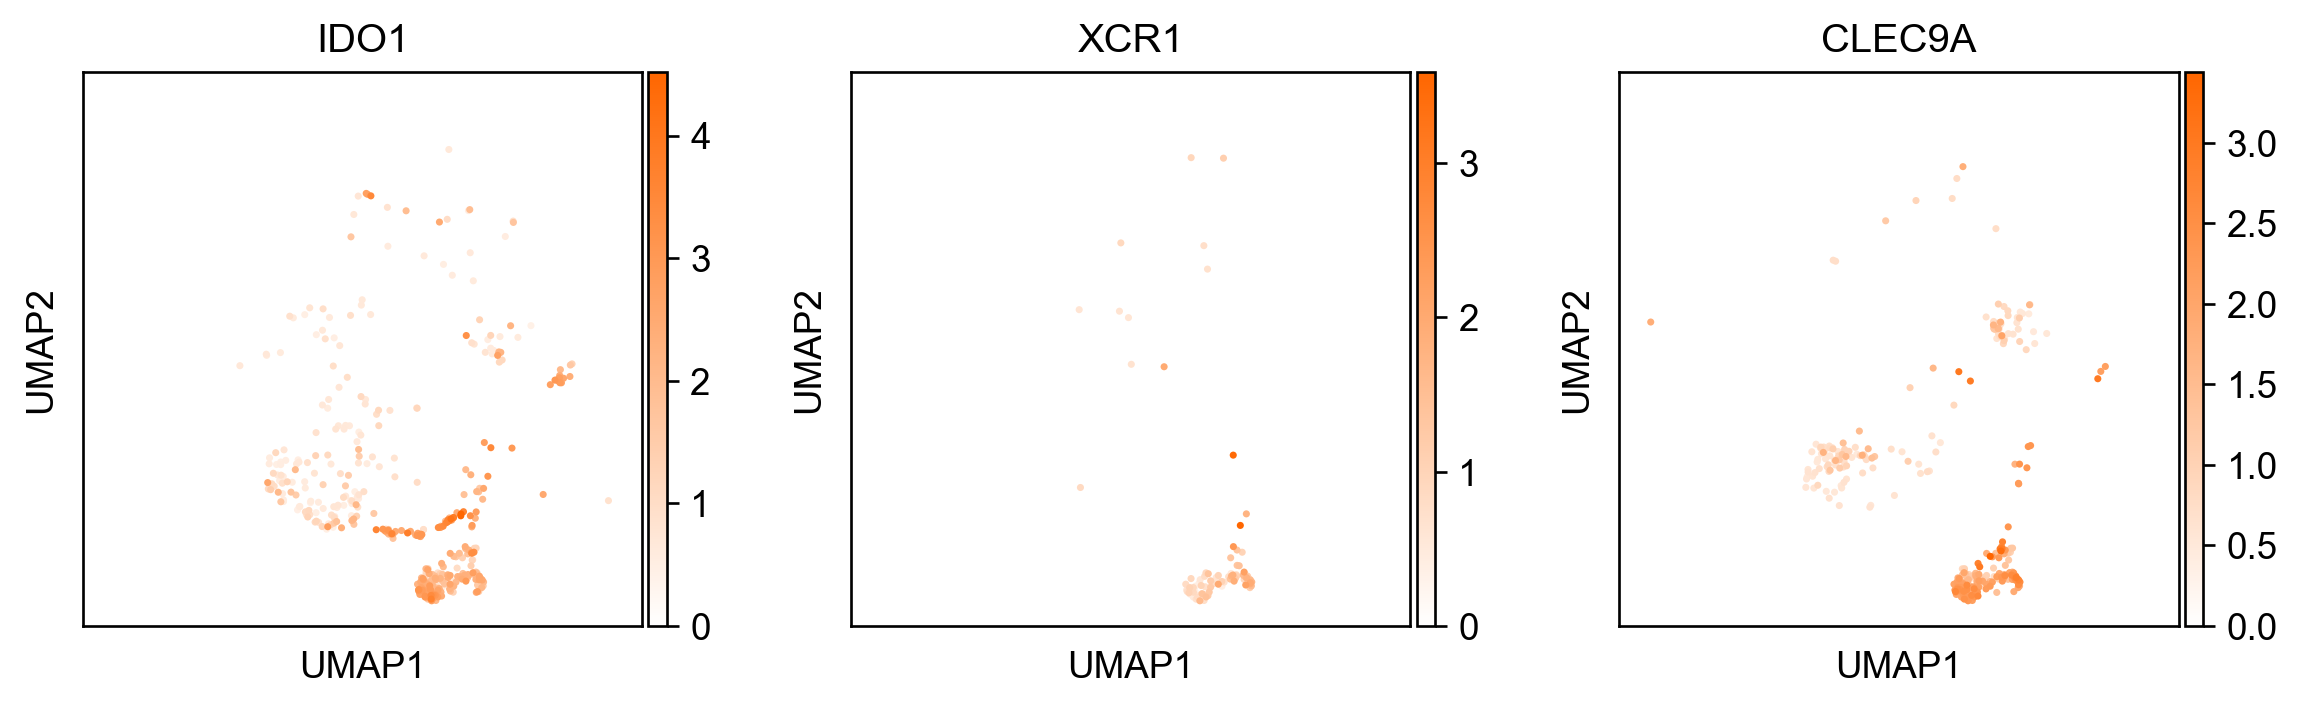

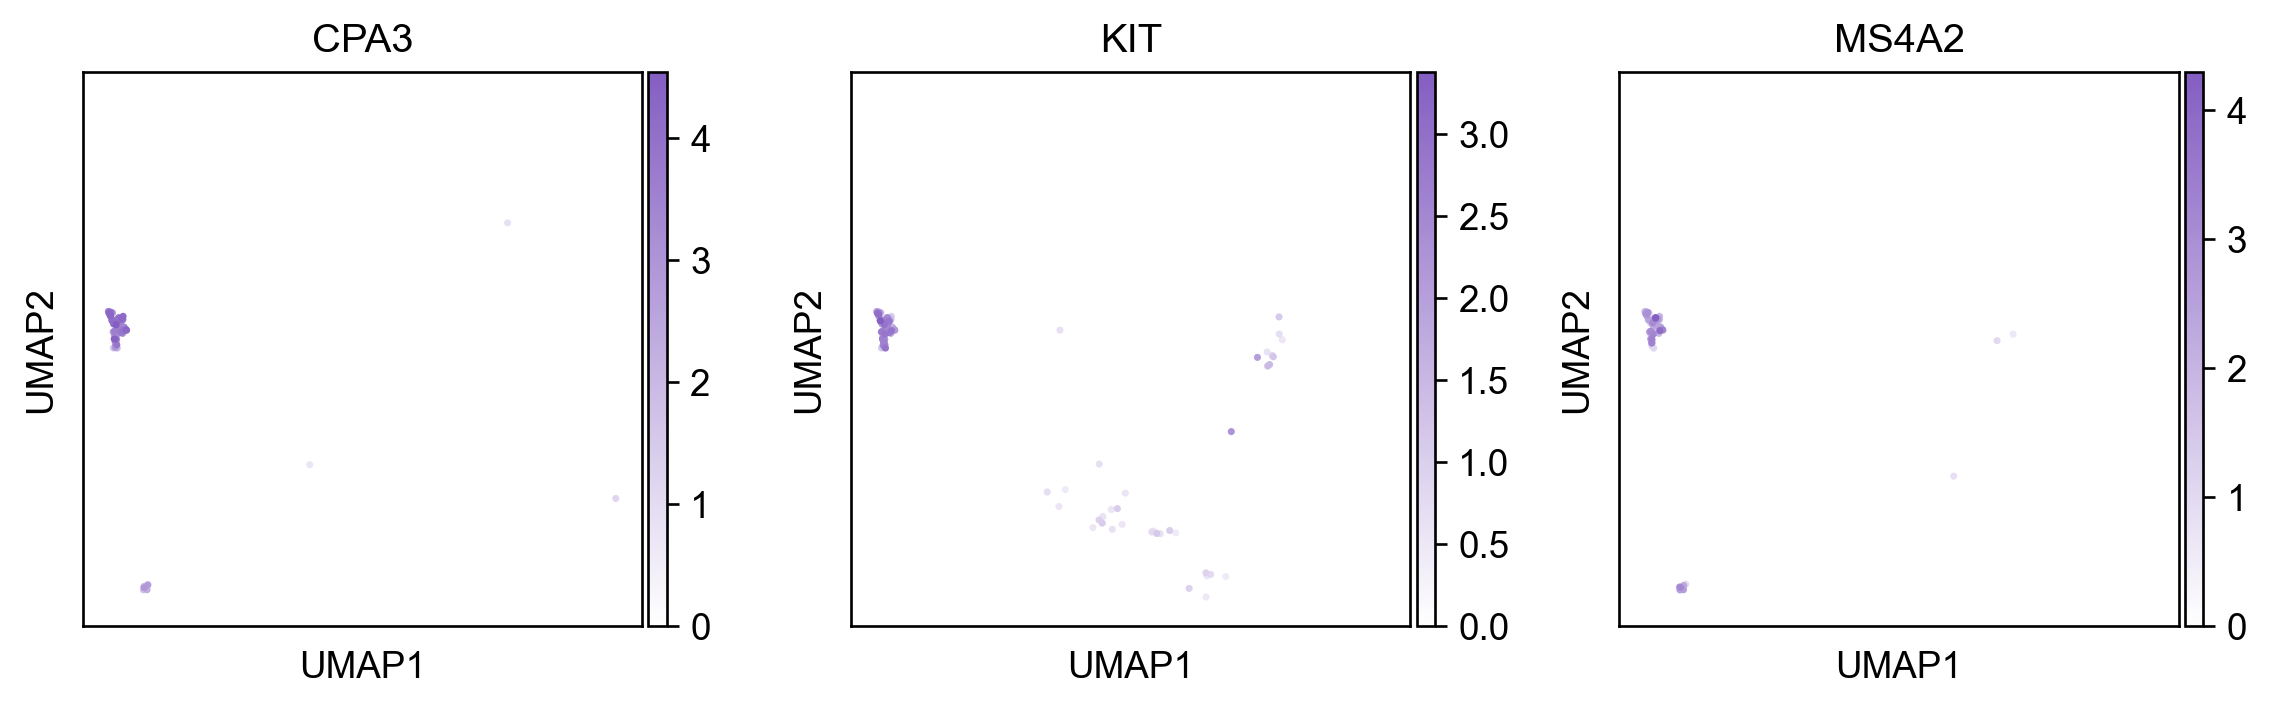

In [110]:
color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#bb135d')], N=256)
sc.pl.umap(adata, color=['APOE', 'C1QA', 'C1QB'], ncols=5, wspace=0.25, # legend_loc='on data', 
    cmap=color_loc_1, frameon=True, show=True, save='_01_01_Macrophage.pdf')

color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#0073ff')], N=256)
sc.pl.umap(adata, color=['S100A9', 'FCN1', 'S100A8'], ncols=5, wspace=0.25, # legend_loc='on data', 
    cmap=color_loc_1, frameon=True, show=True, save='_01_02_Monocytes.pdf')

color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#FF6600')], N=256)
sc.pl.umap(adata, color=['IDO1', 'XCR1', 'CLEC9A'], ncols=5, wspace=0.25, # legend_loc='on data', 
    cmap=color_loc_1, frameon=True, show=True, save='_01_03_Dendritic.pdf')

color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#845ec2')], N=256)
sc.pl.umap(adata, color=['CPA3', 'KIT', 'MS4A2'], ncols=5, wspace=0.25, # legend_loc='on data', 
    cmap=color_loc_1, frameon=True, show=True, save='_01_04_Mast.pdf')

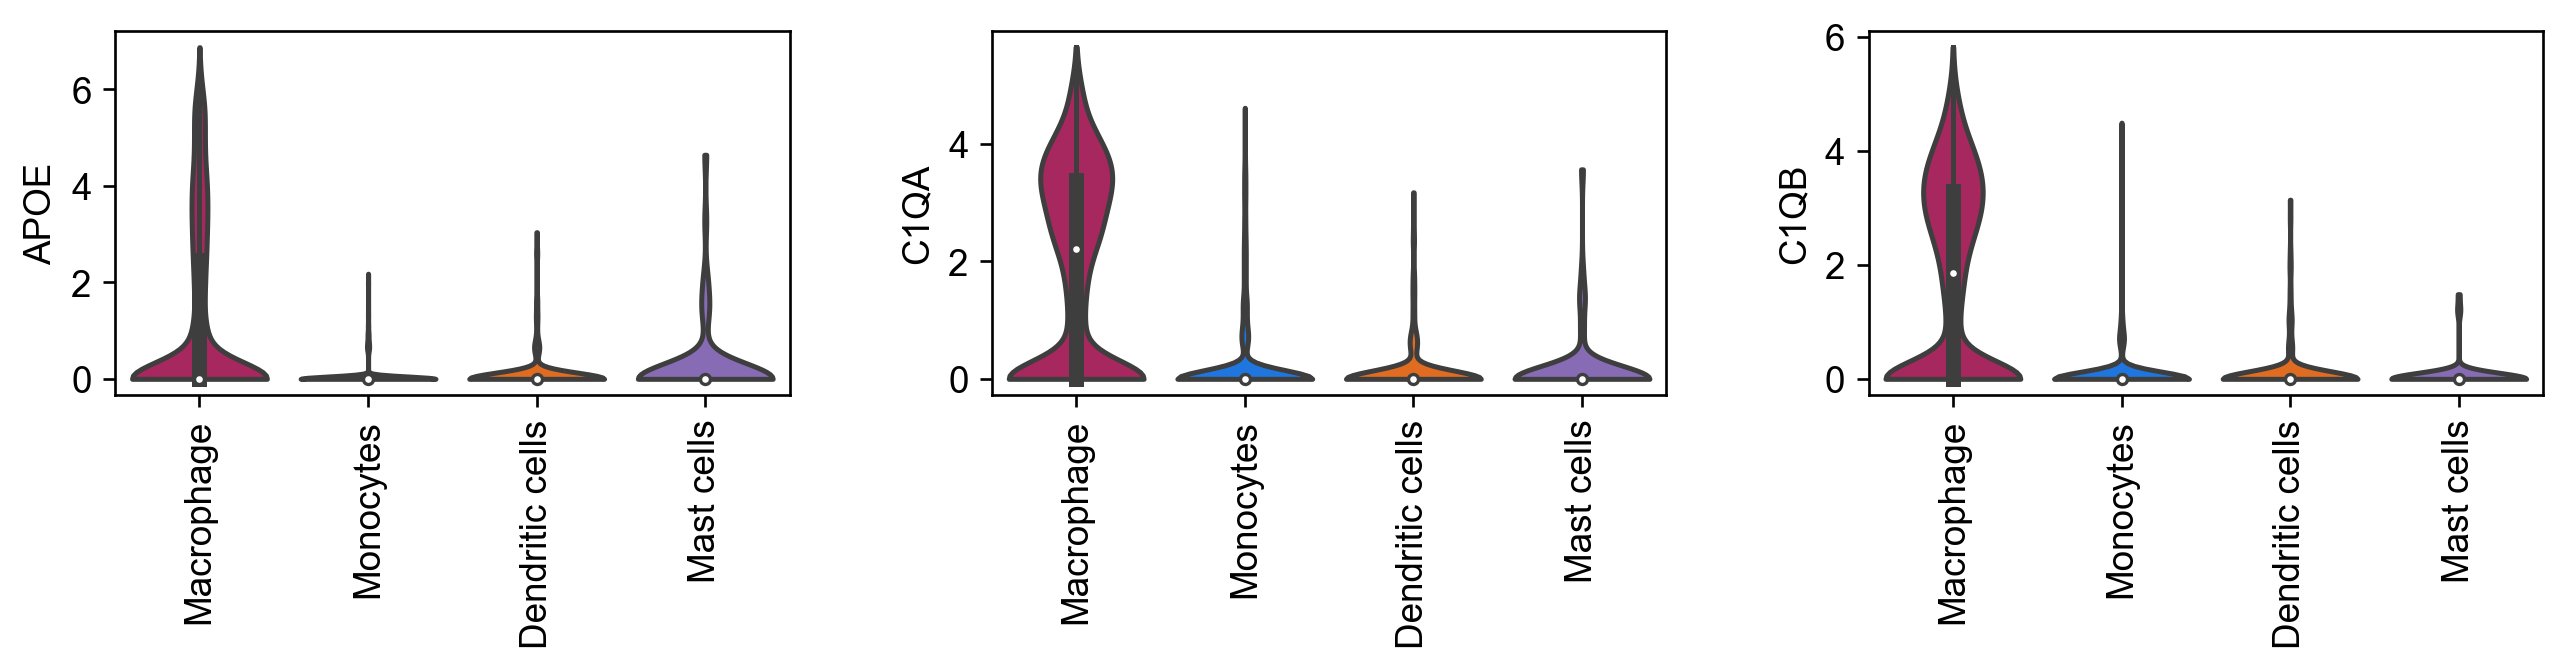

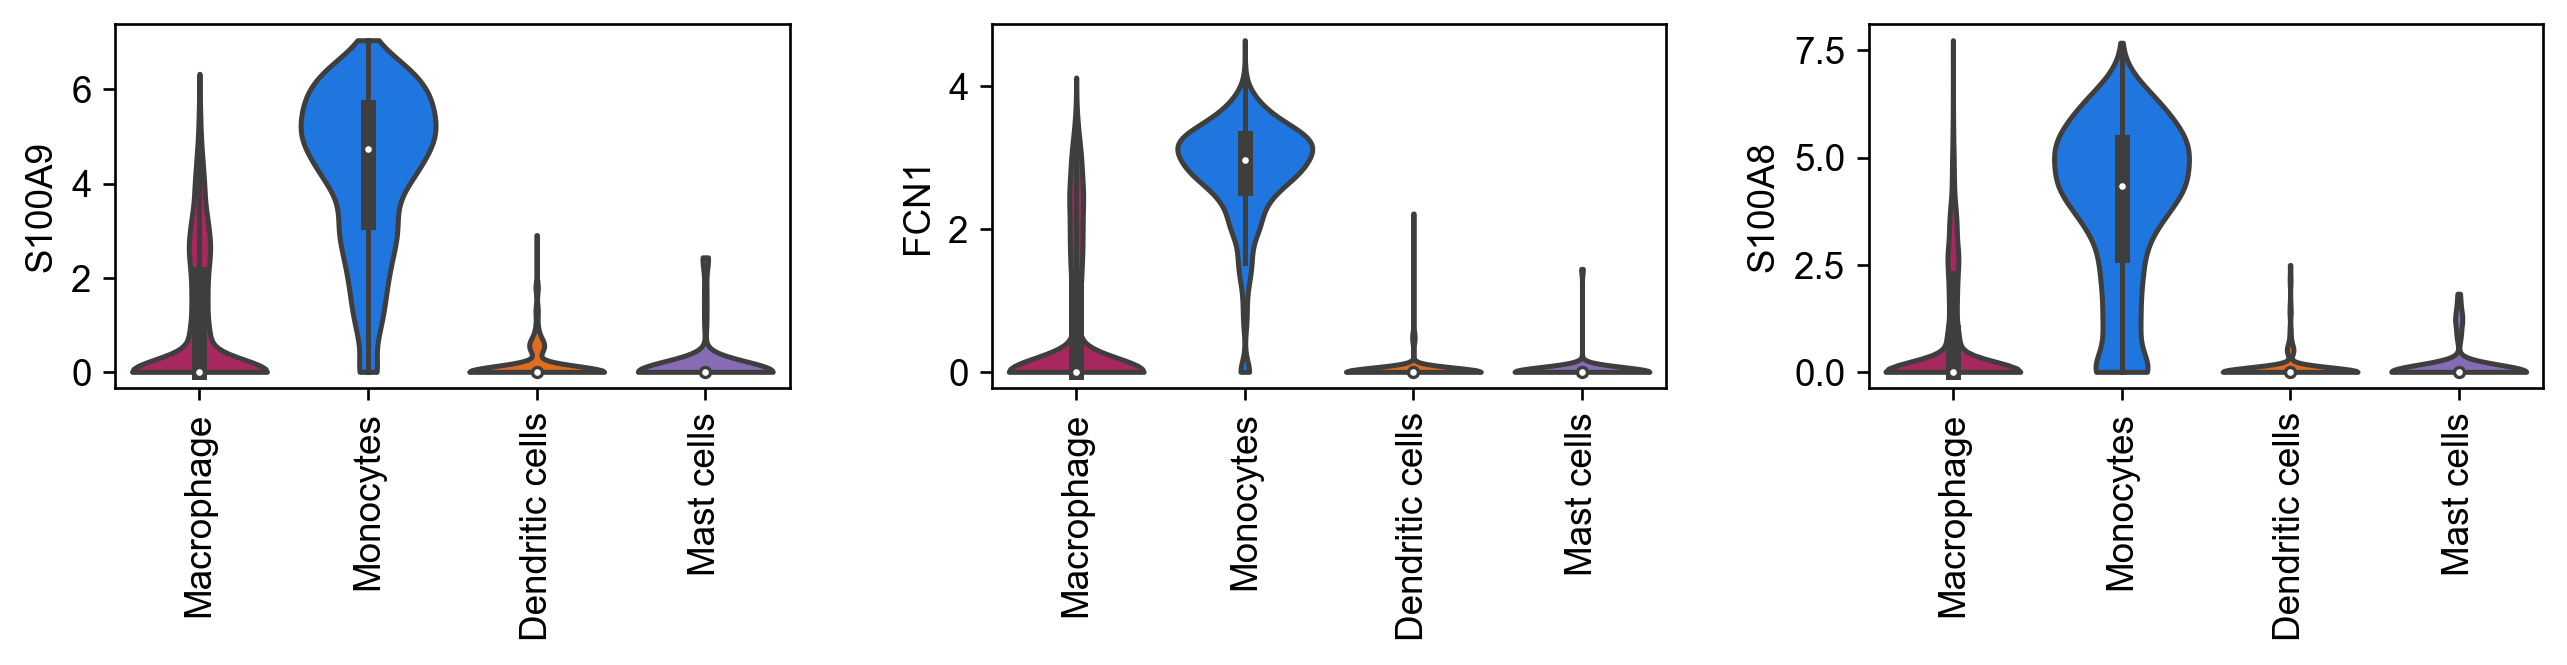

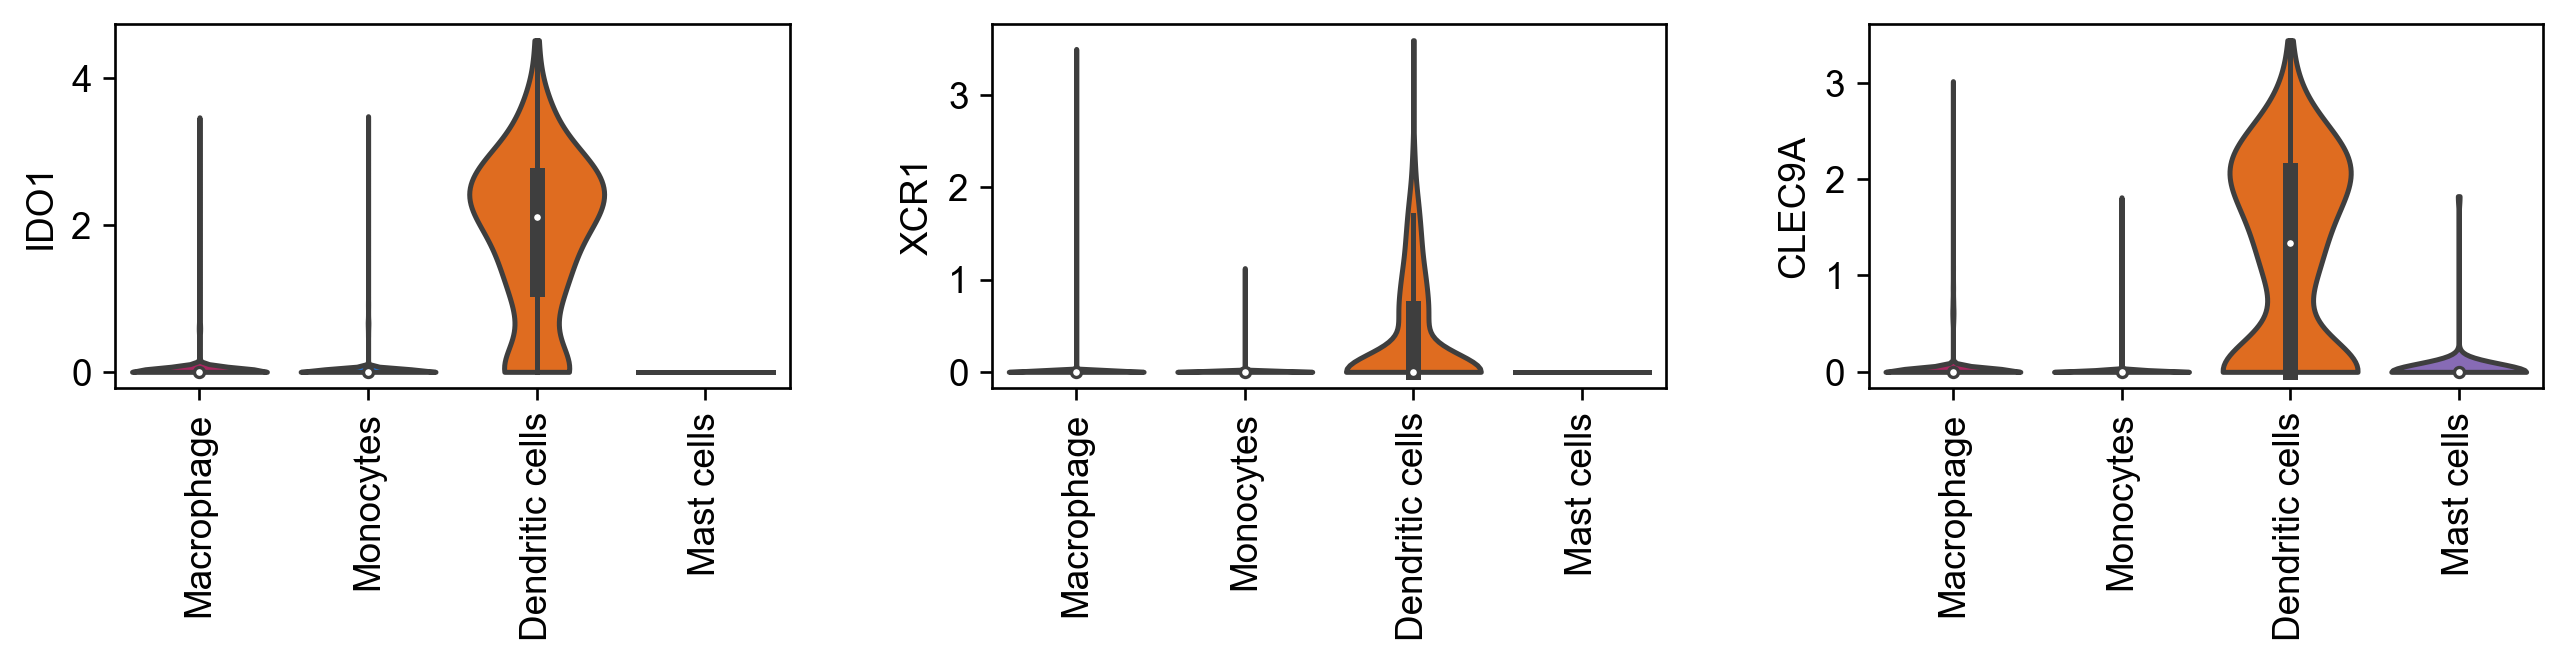

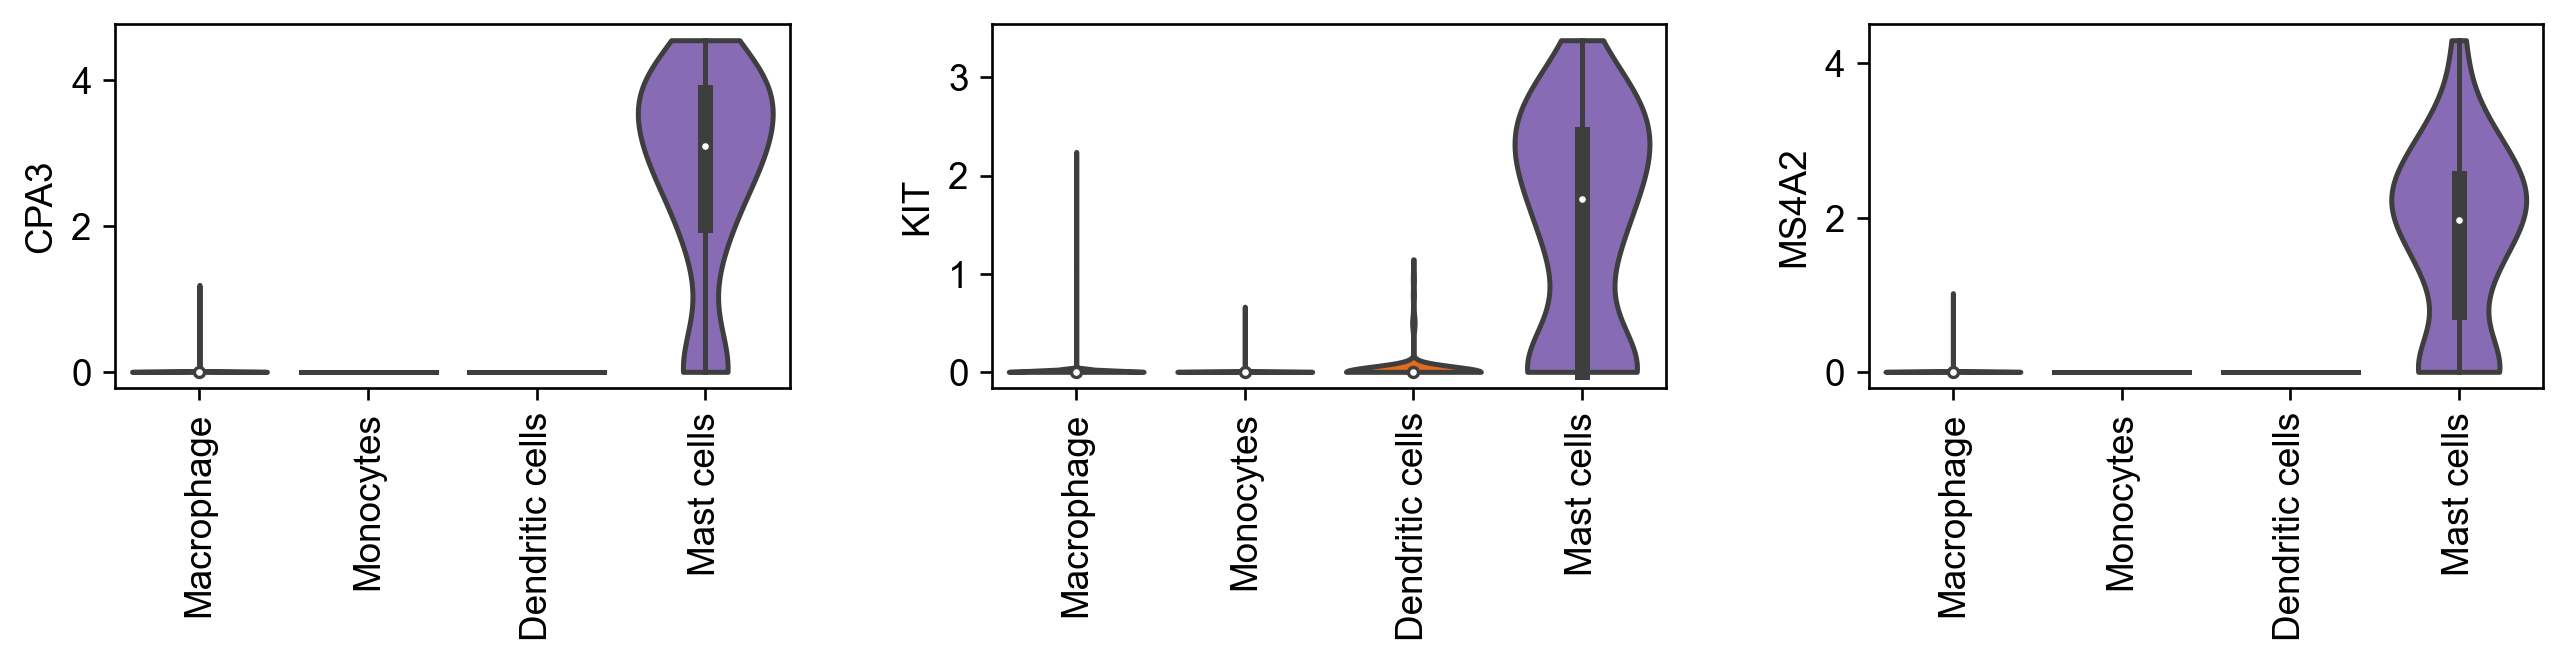

In [111]:
with rc_context({'figure.figsize': (4, 2), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.violin(adata, ['APOE', 'C1QA', 'C1QB'], groupby='Myeloid_cluster', rotation=90, swap_axes=True, stripplot=False, inner='box', show=True, save="_05_01_Macrophage.pdf")
    sc.pl.violin(adata, ['S100A9', 'FCN1', 'S100A8'], groupby='Myeloid_cluster', rotation=90, swap_axes=True, stripplot=False, inner='box', show=True, save="_05_02_Monocytes.pdf")
    sc.pl.violin(adata, ['IDO1', 'XCR1', 'CLEC9A'], groupby='Myeloid_cluster', rotation=90, swap_axes=True, stripplot=False, inner='box', show=True, save="_05_03_Dendritic.pdf")
    sc.pl.violin(adata, ['CPA3', 'KIT', 'MS4A2'], groupby='Myeloid_cluster', rotation=90, swap_axes=True, stripplot=False, inner='box', show=True, save="_05_04_Mast.pdf")

In [112]:
marker_genes = {
    'Macrophage': ['APOE', 'C1QA', 'C1QB'],
    'Monocytes': ['S100A9', 'FCN1', 'S100A8'],
    'Dendritic cells': ['IDO1', 'XCR1', 'CLEC9A'],
    'Mast cells': ['CPA3', 'KIT', 'MS4A2'],
    }

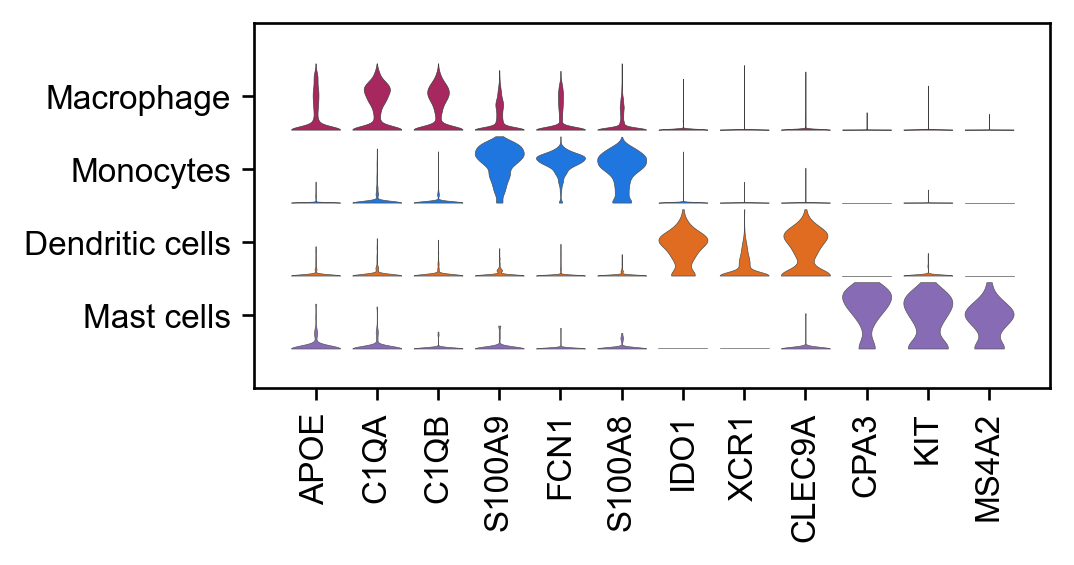

In [113]:
with rc_context({'figure.figsize': (6, 2), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.stacked_violin(adata, ['APOE', 'C1QA', 'C1QB', 'S100A9', 'FCN1', 'S100A8', 'IDO1', 'XCR1', 'CLEC9A', 'CPA3', 'KIT', 'MS4A2'], 
                         groupby='Myeloid_cluster', values_to_plot='logfoldchanges', var_group_rotation=90, rotation=0, vmax=1, vmin=-1, figsize=(6, 2),
                         row_palette=['#BB135D', '#0073FF', '#FF6600', '#845EC2'], 
                         standard_scale='var', mean_only_expressed=True, swap_axes=False, dendrogram=False, show=True, save="01_Myeloid_v1.pdf")

## Filter Marker genes

In [114]:
sc.tl.rank_genes_groups(adata, groupby='Myeloid_cluster', method='wilcoxon')

In [115]:
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.25, max_out_group_fraction=0.5, min_fold_change=0.5)

In [116]:
color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('blue', [(0, '#FFFFFF'), (1, '#003399')], N=256)

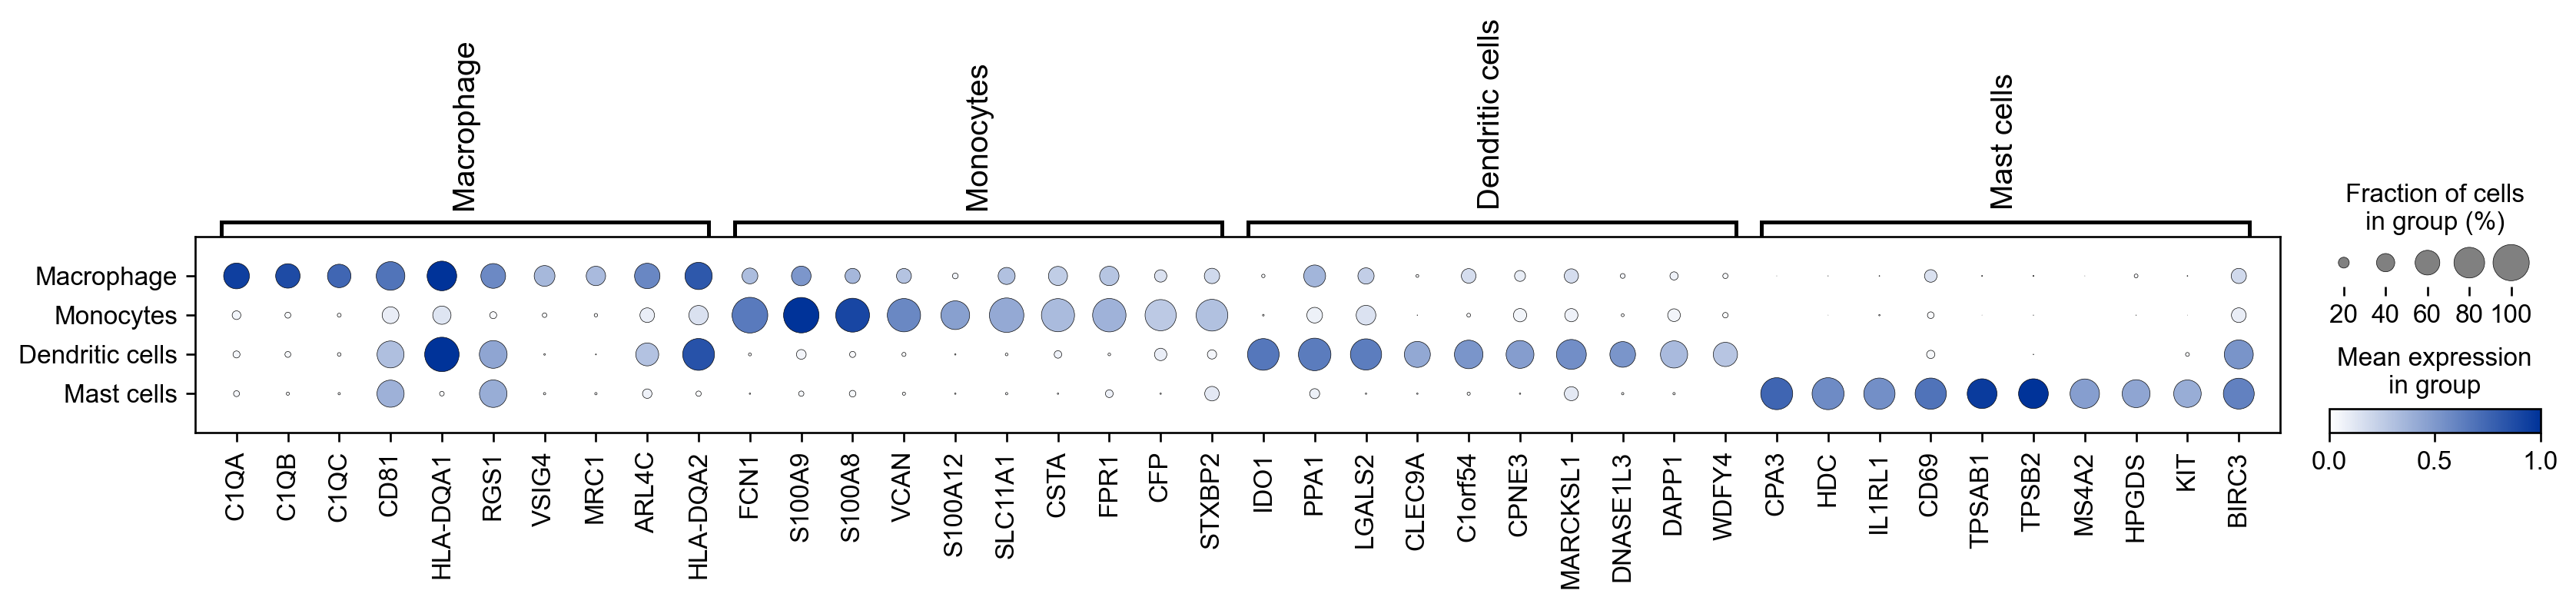

In [117]:
with rc_context({'figure.figsize': (9, 3), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.rank_genes_groups_dotplot(adata, n_genes=10, key='rank_genes_groups_filtered', cmap=color_loc_1, 
                                    dendrogram=False, standard_scale='group', save='02_Myeloid_cluster_v1.pdf')

In [118]:
color_normal = mpl.colors.LinearSegmentedColormap.from_list('blue', 
                                             [(0,    '#98df8a'),
                                              (0.5,  '#FFFFFF'),
                                              (1,    '#845EC2')], N=256)

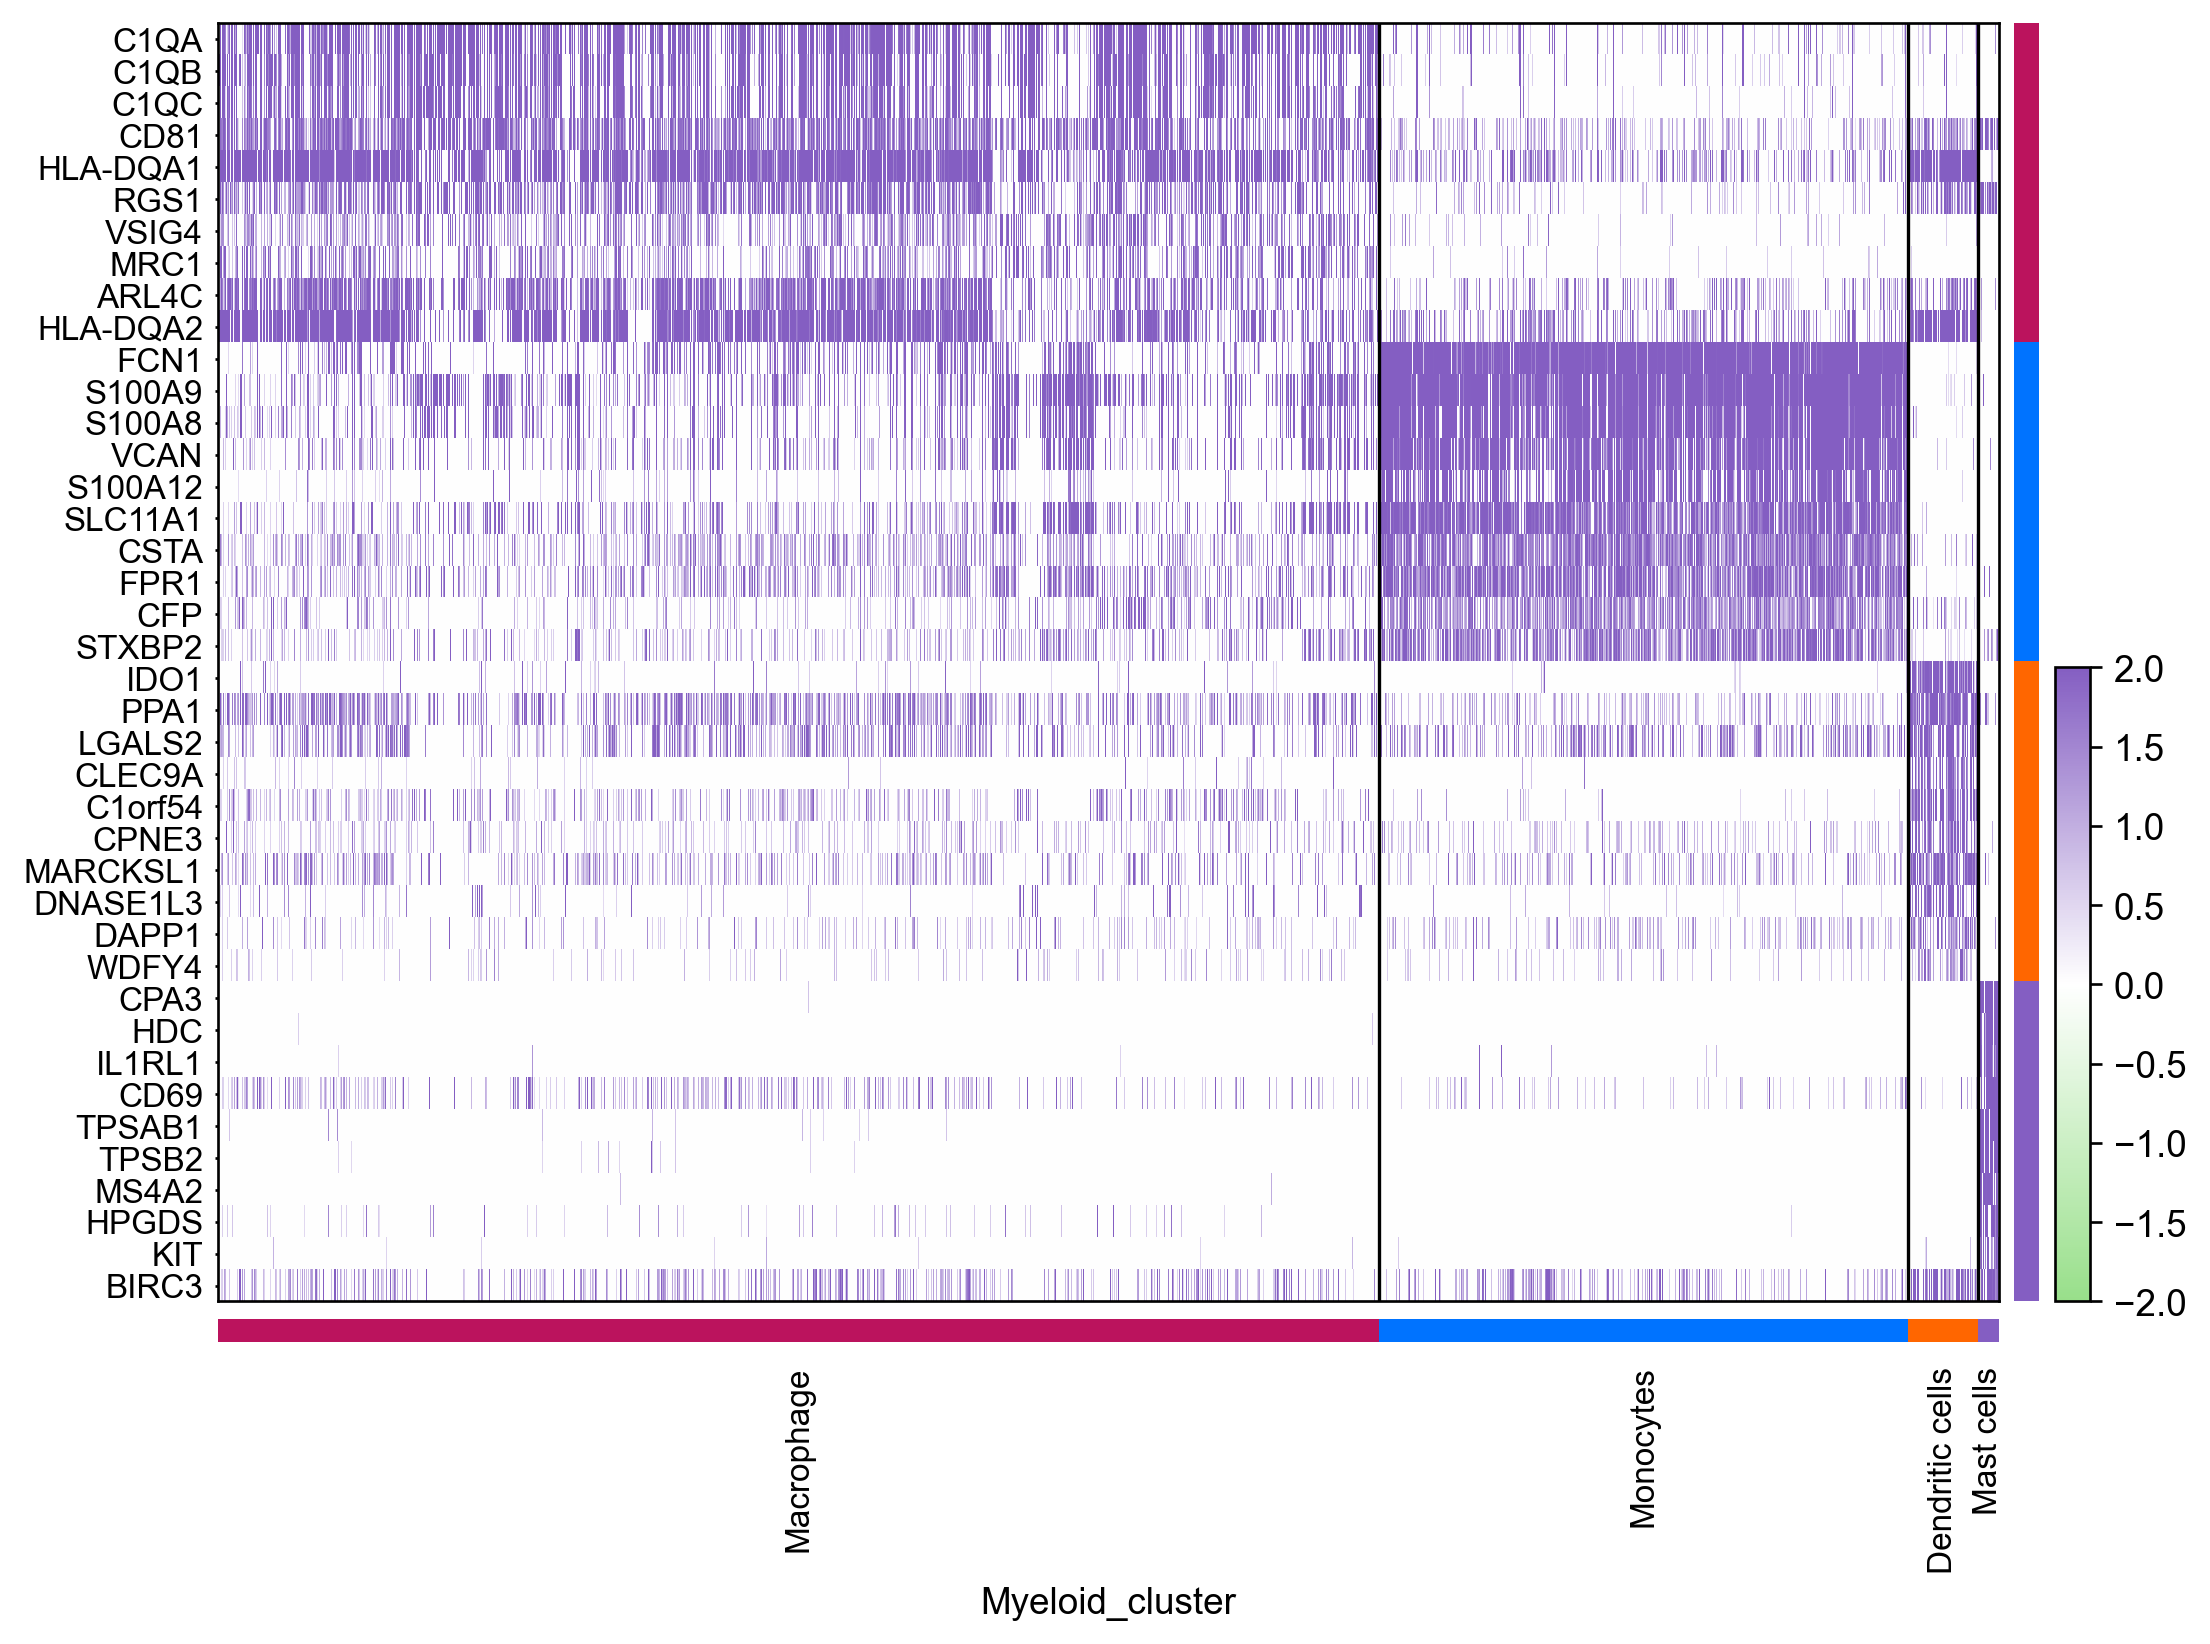

In [119]:
with rc_context({'figure.figsize': (9, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
   sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, key='rank_genes_groups_filtered', show_gene_labels=True,
                                   swap_axes=True, vmax=2, vmin=-2, cmap=color_normal, dendrogram=False, save='_02_Myeloid_cluster_v1.pdf')

## Fraction of cell type

In [120]:
adata.obs

batch  n_genes_by_counts  total_counts  n_genes  \
ATCGTAGTCCGTGACG-1   Col_N_1                442         916.0      442   
CAAGGGACAGAGGCTA-1   Col_N_1                326         712.0      326   
CAGCAATAGGACAGCT-1   Col_N_1                782        1448.0      782   
CAGGGCTCATGTACGT-1   Col_N_1               2466        9730.0     2466   
CATTGAGCAAAGGGCT-1   Col_N_1               2708       11213.0     2708   
...                      ...                ...           ...      ...   
TTACGTTAGGCTCACC-1  Liv_T_12               2836       14258.0     2836   
TTCTTCCCACCTCTGT-1  Liv_T_12               2262       11611.0     2262   
TTGAACGGTACTTCCC-1  Liv_T_12                911        2450.0      911   
TTGTTCATCCGCGGAT-1  Liv_T_12                337        1121.0      337   
TTTACCACAAATACAG-1  Liv_T_12               2771       14506.0     2771   

                    log1p_n_genes_by_counts  log1p_total_counts  \
ATCGTAGTCCGTGACG-1                 6.093570            6.821107   
CAAGGGACAGAGGCTA-1                 5.789960            6.569481   
CAGCAATAGGACAGCT-1                 6.663133            7.278629   
CAGGGCTCATGTACGT-1                 7.810758            9.183072   
CATTGAGCAAAGGGCT-1                 7.904335            9.324919   
...                                     ...                 ...   
TTACGTTAGGCTCACC-1                 7.950502            9.565144   
TTCTTCCCACCTCTGT-1                 7.724447            9.359795   
TTGAACGGTACTTCCC-1                 6.815640            7.804251   
TTGTTCATCCGCGGAT-1                 5.823046            7.022868   
TTTACCACAAATACAG-1                 7.927324            9.582387   

                    pct_counts_in_top_20_genes  total_counts_mt  \
ATCGTAGTCCGTGACG-1                   40.393013             89.0   
CAAGGGACAGAGGCTA-1                   45.786517             61.0   
CAGCAATAGGACAGCT-1                   20.165746            133.0   
CAGGGCTCATGTACGT-1                   20.400822            845.0   
CATTGAGCAAAGGGCT-1                   21.840721           1009.0   
...                                        ...              ...   
TTACGTTAGGCTCACC-1                   20.823397            404.0   
TTCTTCCCACCTCTGT-1                   30.695031            779.0   
TTGAACGGTACTTCCC-1                   26.040816            224.0   
TTGTTCATCCGCGGAT-1                   50.401427            108.0   
TTTACCACAAATACAG-1                   24.127947            898.0   

                    log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
ATCGTAGTCCGTGACG-1               4.499810       9.716157               13.0   
CAAGGGACAGAGGCTA-1               4.127134       8.567416               11.0   
CAGCAATAGGACAGCT-1               4.897840       9.185083              226.0   
CAGGGCTCATGTACGT-1               6.740520       8.684481             1943.0   
CATTGAGCAAAGGGCT-1               6.917706       8.998485             1874.0   
...                                   ...            ...                ...   
TTACGTTAGGCTCACC-1               6.003887       2.833497             2651.0   
TTCTTCCCACCTCTGT-1               6.659294       6.709156             1691.0   
TTGAACGGTACTTCCC-1               5.416101       9.142857              385.0   
TTGTTCATCCGCGGAT-1               4.691348       9.634254              142.0   
TTTACCACAAATACAG-1               6.801283       6.190542             2742.0   

                    log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  \
ATCGTAGTCCGTGACG-1                 2.639057         1.419214              0.0   
CAAGGGACAGAGGCTA-1                 2.484907         1.544944              0.0   
CAGCAATAGGACAGCT-1                 5.424950        15.607736              0.0   
CAGGGCTCATGTACGT-1                 7.572503        19.969168              7.0   
CATTGAGCAAAGGGCT-1                 7.536364        16.712744              0.0   
...                                     ...              ...              ...   
TTACGTTA

In [121]:
res = pd.DataFrame(adata.obs[['batch', 'Myeloid_cluster']])
res.to_csv("Fraction_batch_Myeloid_v1.csv", sep="\t")
res['Myeloid_cluster'].value_counts()

Macrophage         4319
Monocytes          1970
Dendritic cells     260
Mast cells           78
Name: Myeloid_cluster, dtype: int64

## Number of cells of APOE in louvain_NK

In [122]:
# number of cells of IL7R in Myeloid_cluster
marker_genes = ['APOE']

genedf = sc.get.obs_df(
        adata,
        keys=["Myeloid_cluster", *marker_genes],
        # use_raw=False
    )
genedf.sort_values(by=['APOE'], ascending=False)
genedf.sort_values(by=['APOE'], ascending=False).groupby('Myeloid_cluster').value_counts()
genedf.sort_values(by=['APOE'], ascending=False).groupby('Myeloid_cluster')['APOE'].value_counts()
res=genedf.sort_values(by=['APOE'], ascending=False).groupby('Myeloid_cluster')['APOE'].value_counts()
res.to_csv('diff_Myeloid_APOE_cell_number_v1.csv')

res=pd.DataFrame(res)
res=res.groupby('Myeloid_cluster')['APOE'].value_counts()
res.to_csv('diff_Myeloid_APOE_cell_number_v2.csv')